## Table of Contents 
I. Introduction <br>
&nbsp;  &nbsp;  a. Background <br>
&nbsp;  &nbsp;  b. Research Question <br>
&nbsp;  &nbsp;  c. Data Collection and Cleaning Summary <br>
&nbsp;  &nbsp;  d. Results Summary <br>
II. Data Description <br>
III. Exploratory Data Analysis <br>
IV. Data Analysis and Interpretations <br>
&nbsp;  &nbsp;  a. Hypothesis 1 <br>
&nbsp;  &nbsp;  b. Hypothesis 2 <br>
&nbsp;  &nbsp;  c. Hypothesis 3 <br>
&nbsp;  &nbsp;  &nbsp;  &nbsp;  i. Analysis 1 <br>
&nbsp;  &nbsp;  &nbsp;  &nbsp;  ii. Analysis 2 <br>
&nbsp;  &nbsp;  d. Hypothesis 4 <br>
&nbsp;  &nbsp;  e. Hypothesis 5 <br>
V. Conclusions<br>
VI. Limitations <br>
VII. Acknowledgements <br>





# Introduction

### Background

Cornell University is one of the nation's most sustainable universities. Cornell often boasts about their different initiatives, which in the past decade have included the renovation and certification of buildings as LEED (Leadership in Energy and Environmental Design) buildings. LEED is an industry-standard building efficiency rating system. Certified buildings are supposed to be more sustainable, in 7 different categories, than regular buildings. One of those categories evaluated building efficiency in terms of space cooling and heating. Cornell has a website dedicated to the green buildings on campus (LEED certified buildings), where we can see which buildings are LEED certified and how they scored on the LEED scorecard. Cornell University also has an energy dashboard, where we can access real time usage of several different metrics (like chilled water use, electricity use, and steam use) in a building, and even view data from the past. <br>
<br>
With these two resources available, we wanted to see if LEED certification actually contributed to reductions in resource use, which is how we arrived to our research question.

### Research Question 
Question: How do Cornell's LEED certified buildings compare to Cornell's non-LEED certified buildings in terms of chilled water and steam usage per square foot during respective peak months?

### Data Collection and Cleaning
**Building Selection**

LEED Certified Buildings Source: https://sustainablecampus.cornell.edu/buildings-energy/green-buildings

We selected six LEED certified and six non-LEED certified buildings in Cornell University to use in our project.  We chose buildings based on their availability on the energy portal (see below), having at least five years of data for each of Chilled Water (for cooling), Electricity, and Steam (for heating), and having clean data across the three metrics.  We defined clean data loosely as having minimal missing data and few outliers visible when viewing the online interactive time-series graphs (see "Energy Data" below).  We gave preference to academic buildings that are open year-round for the best consistency.  We disqualified dorms because some are only open during the academic year, and we disqualified dining halls due to excessive energy usage in the kitchens, dish rooms, etc.

After looking through the website for LEED certified buildings, we chose Upson Hall, Warren Hall, Gates Hall, Milstein Hall, Fernow Hall, and Human Ecology Building based on the criteria above.  For the non-LEED certified buildings, we chose Olin Library, Snee Hall, Uris Library, Uris Hall, Lincoln Hall, and Mann Library based on the criteria above.

**Energy Data**

Source: https://portal.emcs.cornell.edu/

We downloaded time-series data for the six LEED certified and six non-LEED certified buildings above from the publicly-accessible Cornell Energy Management Control System portal.  The data was available in various forms of aggregation (no aggregation, hourly aggregation, and daily aggregation).  Because we will be ultimately aggregating the data by month, we chose daily aggregation to minimize file size (smaller aggregations are not necessary).

We downloaded the last five years of data (October 18th, 2018 – October 18th, 2023) of all 12 buildings into 12 different Excel files.  Each file of the raw data contains columns for the timestamp, aggregated value, and metric in a long format.

**Building Square Footage Data**

Source: https://findfacilities-prod.fcs.cornell.edu/searchfacilities

Comparing raw energy usage between buildings would be meaningless because larger buildings would naturally use more energy.  To solve this, we standardize energy usage by dividing it by the square footage of the building.

We obtained the square footage of each building by searching for the building on the above page, clicking the "Historic Information" button on the right, and noting the Gross Area.

**Data Cleaning**

Our raw data consists of 12 excel files and information from the web, like square footage and LEED certification status. We turn each Excel file into a Pandas dataframe with a date column of type `datetime` as the first column, and subsequent columns for each Chilled Water use, Steam use, and Electrcity use, which are all normalized by the building's square footage. Their LEED Certification Status is kept in the name of the dataframes. Any NaNs were removed.

### Results Summary
Our analyses show that there is some efficiency improvement between LEED Buildings and Non LEED buildings in terms of their chilled water usage and their steam usage. However, when it comes to comparing LEED buildings' energy and atmosphere scores, we found no correlation between a higher score and better efficiency performance.

### Data Cleaning

In [109]:
# Importing packages
import numpy as np
import pandas as pd
from datetime import datetime
from dateutil import tz
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime as dt
import seaborn as sns
import scipy
from scipy import stats
from scipy.stats import t
import statsmodels.api as sm

We first read the raw excel files downloaded from the Cornell energy dashboard. We had to add the 'openpyxl' package using Anaconda Navigator for our info2950 virtual environment in order to read Excel files.

We load the LEED certified buildings:

In [110]:
upson_hall_df = pd.DataFrame(pd.read_excel("Data/UpsonHall.xlsx"))
warren_hall_df= pd.DataFrame(pd.read_excel("Data/WarrenHall.xlsx"))
gates_hall_df= pd.DataFrame(pd.read_excel("Data/GatesHall.xlsx"))
milstein_hall_df= pd.DataFrame(pd.read_excel("Data/MilsteinHall.xlsx"))
fernow_hall_df= pd.DataFrame(pd.read_excel("Data/FernowHall.xlsx"))
human_eco_df = pd.DataFrame(pd.read_excel("Data/HumanEco.xlsx"))

leed_dfs = [upson_hall_df, warren_hall_df, gates_hall_df, milstein_hall_df, fernow_hall_df, human_eco_df]

# Verifying shape
for df in leed_dfs:
    print(df.shape)

# Checking how one of the DataFrame looks
leed_dfs[0].head()

(5248, 5)
(5457, 5)
(5341, 5)
(5451, 5)
(5475, 5)
(5456, 5)


,name,slottime_GMT,slottype,slotavg,pointTitle
0,UpsonHall.CW.FP/TONS,2018-10-20 00:00:00,D,6.791259,Chilled Water
1,UpsonHall.STM.M22-V/AverageMassFlow,2018-10-20 00:00:00,D,447.967765,Steam
2,UpsonHall.CW.FP/TONS,2018-10-21 00:00:00,D,5.762554,Chilled Water
3,UpsonHall.STM.M22-V/AverageMassFlow,2018-10-21 00:00:00,D,817.265194,Steam
4,UpsonHall.CW.FP/TONS,2018-10-22 00:00:00,D,7.097030,Chilled Water


We load the non-LEED certified buildings:

In [111]:
olin_library_df= pd.DataFrame(pd.read_excel("Data/OlinLibrary.xlsx"))
snee_hall_df= pd.DataFrame(pd.read_excel("Data/SneeHall.xlsx"))
lincoln_hall_df = pd.DataFrame(pd.read_excel("Data/LincolnHall.xlsx"))
uris_hall_df = pd.DataFrame(pd.read_excel("Data/UrisHall.xlsx"))
uris_library_df = pd.DataFrame(pd.read_excel("Data/UrisLibrary.xlsx"))
mann_library_df= pd.DataFrame(pd.read_excel("Data/MannLibrary.xlsx"))

non_leed_dfs = [olin_library_df, snee_hall_df, lincoln_hall_df, uris_hall_df, uris_library_df, mann_library_df]

# Verifying shape
for df in non_leed_dfs:
    print(df.shape)

#Snee Hall has more than the usual 3 categories so it has more rows than usual
# Uris Hall has more than the usual 3 categories so it has more rows than usual

# Checking how the DataFrames looks
non_leed_dfs[0].head()

(5452, 5)
(6813, 5)
(5445, 5)
(8101, 5)
(5459, 5)
(5390, 5)


,name,slottime_GMT,slottype,slotavg,pointTitle
0,OlinLibrary.CW.FP/TONS,2018-10-20 00:00:00,D,21.218754,Chilled Water
1,OlinLibrary.Elec.PowerScout3/kWsystem,2018-10-20 00:00:00,D,151.132292,Electric
2,OlinLibrary.STM.M22-V/AverageMassFlow,2018-10-20 00:00:00,D,818.883828,Steam
3,OlinLibrary.CW.FP/TONS,2018-10-21 00:00:00,D,18.226513,Chilled Water
4,OlinLibrary.Elec.PowerScout3/kWsystem,2018-10-21 00:00:00,D,165.905208,Electric


After creating the data frames, we turned their date column into pandas DateTime to easily work with and manipulate. We also renamed the column to 'date.'

Going forward, each step of cleaning will be run on the both the LEED certified and non-LEED certified buildings

In [112]:
# For each one of the six LEED Building DataFrames, turn the 'slottime_GMT' column into DateTime values
# Then, rename the 'slottime_GMT' column to 'date' for each building DataFrame

for df in leed_dfs:
    df["slottime_GMT"] = pd.to_datetime(df['slottime_GMT'])
    df.rename(columns={"slottime_GMT": "date"}, inplace=True)

leed_dfs[0].head()

,name,date,slottype,slotavg,pointTitle
0,UpsonHall.CW.FP/TONS,2018-10-20,D,6.791259,Chilled Water
1,UpsonHall.STM.M22-V/AverageMassFlow,2018-10-20,D,447.967765,Steam
2,UpsonHall.CW.FP/TONS,2018-10-21,D,5.762554,Chilled Water
3,UpsonHall.STM.M22-V/AverageMassFlow,2018-10-21,D,817.265194,Steam
4,UpsonHall.CW.FP/TONS,2018-10-22,D,7.097030,Chilled Water


In [113]:
# For each one of the six non-LEED Building DataFrames, turn the 'slottime_GMT' column into DateTime values
# Then, rename the 'slottime_GMT' column to 'date' for each building DataFrame

for df in non_leed_dfs:
    df["slottime_GMT"] = pd.to_datetime(df['slottime_GMT'])
    df.rename(columns={"slottime_GMT": "date"}, inplace=True)

non_leed_dfs[0].head()

,name,date,slottype,slotavg,pointTitle
0,OlinLibrary.CW.FP/TONS,2018-10-20,D,21.218754,Chilled Water
1,OlinLibrary.Elec.PowerScout3/kWsystem,2018-10-20,D,151.132292,Electric
2,OlinLibrary.STM.M22-V/AverageMassFlow,2018-10-20,D,818.883828,Steam
3,OlinLibrary.CW.FP/TONS,2018-10-21,D,18.226513,Chilled Water
4,OlinLibrary.Elec.PowerScout3/kWsystem,2018-10-21,D,165.905208,Electric


We dropped unnecessary columns that we were not going to use in our analysis. This includes the 'name' column, and 'slottype' column. Slottype was a column of the letter 'D,' and 'name' was the name of the hall and the units of measurent for the either Chilled water, steam, or energy. We kept note of unit of measurement separately, and the name of the hall is assigned to the dataframe. We needed to drop the categorical columns (except the ones we will pivot on) if we wanted to use the resample() method to average our data per month instead of per day.

In [114]:
# Note: The 'name' columns contains the units of electric, steam, and chilled water energy consumption amounts, 
#       which we made note of outside of the dataset 
for df in leed_dfs:
    df.drop(['name', 'slottype'], inplace=True, axis=1)

leed_dfs[0].head()

,date,slotavg,pointTitle
0,2018-10-20,6.791259,Chilled Water
1,2018-10-20,447.967765,Steam
2,2018-10-21,5.762554,Chilled Water
3,2018-10-21,817.265194,Steam
4,2018-10-22,7.097030,Chilled Water


In [115]:
# Drop name and slottype columns since they don't provide useful information
for df in non_leed_dfs:
    df.drop(['name', 'slottype'], inplace=True, axis=1)

non_leed_dfs[0].head()

,date,slotavg,pointTitle
0,2018-10-20,21.218754,Chilled Water
1,2018-10-20,151.132292,Electric
2,2018-10-20,818.883828,Steam
3,2018-10-21,18.226513,Chilled Water
4,2018-10-21,165.905208,Electric


For each of the building DataFrames, we will turn the categorical values in the 'pointTitle' column into their own columns using pivot(). This will create three new columns replacing 'pointTitle', which will be called 'ChilledWater', 'Electric', and 'Steam'. The values formerly held in the 'slotavg' column will be spread across these three new columns depending on what measurement they pertain to.

In [116]:
# Pivoting LEED Buildings on pointTitle
for idx, val in enumerate(leed_dfs):
    leed_dfs[idx] = leed_dfs[idx].pivot(index='date', columns='pointTitle', values=['slotavg'])

# upson_hall_df = upson_hall_df.pivot(index='date', columns='pointTitle', values=['slotavg'])
# warren_hall_df = warren_hall_df.pivot(index='date', columns='pointTitle', values=['slotavg'])
# gates_hall_df = gates_hall_df.pivot(index='date', columns='pointTitle', values=['slotavg'])
# milstein_hall_df = milstein_hall_df.pivot(index='date', columns='pointTitle', values=['slotavg'])
# fernow_hall_df = fernow_hall_df.pivot(index='date', columns='pointTitle', values=['slotavg'])
# human_eco_df = human_eco_df.pivot(index='date', columns='pointTitle', values=['slotavg'])

# Pivoting Non LEED Buildings on pointTitle
for idx, val in enumerate(non_leed_dfs):
    non_leed_dfs[idx] = non_leed_dfs[idx].pivot(index='date', columns='pointTitle', values=['slotavg'])

In [117]:
# Checking how our dataframe looks. Noticed our building columns are multiindexed

# LEED 
print(leed_dfs[0].columns)

# Non LEED
print(non_leed_dfs[0].columns)

MultiIndex([('slotavg', 'Chilled Water'),
            ('slotavg',      'Electric'),
            ('slotavg',         'Steam')],
           names=[None, 'pointTitle'])
MultiIndex([('slotavg', 'Chilled Water'),
            ('slotavg',      'Electric'),
            ('slotavg',         'Steam')],
           names=[None, 'pointTitle'])


After performing pivoting in the former step for LEED buildings, we are left with multiindexed columns. The code below flattens the multiindexed columns to the format we expect, so we can access and use columns the way we normally do/ have done in class. 

In [118]:
# Use df.droplevel() and df.rename_axis() to flatten multiindexed columns 
# LEED Building Cell

for idx, val in enumerate(leed_dfs):
    leed_dfs[idx] = leed_dfs[idx].droplevel(0, axis =1).reset_index()
    leed_dfs[idx].columns.name = None
    
for idx, val in enumerate(non_leed_dfs):
    non_leed_dfs[idx] = non_leed_dfs[idx].droplevel(0, axis =1).reset_index()
    non_leed_dfs[idx].columns.name = None

In [119]:
# Check that our LEED building columns are no longer multiindexed
for df in leed_dfs:
    print(df.columns)
    
# Check that our non LEED building columns are no longer multiindexed
for df in non_leed_dfs:
    print(df.columns)

Index(['date', 'Chilled Water', 'Electric', 'Steam'], dtype='object')
Index(['date', 'Chilled Water', 'Electric', 'Steam'], dtype='object')
Index(['date', 'Chilled Water', 'Electric', 'Steam'], dtype='object')
Index(['date', 'Chilled Water', 'Electric', 'Steam'], dtype='object')
Index(['date', 'Chilled Water', 'Electric', 'Steam'], dtype='object')
Index(['date', 'Chilled Water', 'Electric', 'Steam'], dtype='object')
Index(['date', 'Chilled Water', 'Electric', 'Steam'], dtype='object')
Index(['date', 'Chilled Water', 'Electric', 'Photovoltaic Power Production',
       'Steam'],
      dtype='object')
Index(['date', 'Chilled Water', 'Electric', 'Steam'], dtype='object')
Index(['date', 'Chilled Water', 'Electric - 208v', 'Electric - 480v',
       'Electric - Telecom Room', 'Steam', 'Steam for domestic hot water'],
      dtype='object')
Index(['date', 'Chilled Water', 'Electric', 'Steam'], dtype='object')
Index(['date', 'Chilled Water', 'Electric', 'Steam'], dtype='object')


We noticed that the DataFrames for Uris Hall and Snee Hall have additional columns that we don't want for our analysis. Some of the datasets, like these, include additional measurements besides the standard Chilled Water, Electricity, and Steam. We drop/rename them here.

In [120]:
# Drops unnessary columns in from uris_hall_df and snee_hall_df. 
# leed_dfs = [upson_hall_df, warren_hall_df, gates_hall_df, milstein_hall_df, fernow_hall_df, human_eco_df]
# non_leed_dfs = [olin_library_df, snee_hall_df, lincoln_hall_df, uris_hall_df, uris_library_df, mann_library_df]

non_leed_dfs[3].rename(columns={"Electric - 208v": "Electric"}, inplace=True)
non_leed_dfs[3].drop(['Electric - 480v', 'Electric - Telecom Room', 'Steam for domestic hot water'], inplace=True, axis=1)
non_leed_dfs[1].drop(['Photovoltaic Power Production'], inplace=True, axis=1)

print(non_leed_dfs[3].columns)
print(non_leed_dfs[1].columns)

Index(['date', 'Chilled Water', 'Electric', 'Steam'], dtype='object')
Index(['date', 'Chilled Water', 'Electric', 'Steam'], dtype='object')


Next, we set the 'date' column to be the indices of our DataFrames
We then convert the indices to be of type DateTime. Then, we resample the DataFrames so that our rows turn into monthly consumption averages instead of daily consumption data. We needed to set index as date in order use the resample method(). Afterwards using the method, we reset the index so that date returns as one of the columns. 

In [121]:
# Leed Buildings

for idx, val in enumerate(leed_dfs):
    leed_dfs[idx].set_index('date', inplace=True)
    # leed_dfs[idx].index = pd.to_datetime(leed_dfs[idx].index)
    leed_dfs[idx] = leed_dfs[idx].resample('m').mean()
    leed_dfs[idx] = leed_dfs[idx].reset_index()

leed_dfs[0].columns

Index(['date', 'Chilled Water', 'Electric', 'Steam'], dtype='object')

In [122]:
# Non LEED Buildings

for idx, val in enumerate(non_leed_dfs):
    non_leed_dfs[idx].set_index('date', inplace=True)
    # non_leed_dfs[idx].index = pd.to_datetime(non_leed_dfs[idx].index)
    non_leed_dfs[idx] = non_leed_dfs[idx].resample('m').mean()
    non_leed_dfs[idx] = non_leed_dfs[idx].reset_index()

non_leed_dfs[0].head()

,date,Chilled Water,Electric,Steam
0,2018-10-31,22.238879,177.922049,1257.779422
1,2018-11-30,17.153724,170.362951,1481.563266
2,2018-12-31,10.585491,149.982330,1591.172067
3,2019-01-31,5.524511,158.091499,2097.652775
4,2019-02-28,5.542851,171.905469,1848.016640


We want to drop any NaNs for monthly energy consumption in case there was no data for a particular month

In [123]:
# Drops rows that have NaNs in them for monthly energy consumptions, for our LEED buildings

for df in leed_dfs:
    print(df.shape)
    df.dropna(inplace=True)
    print(df.shape)

# None of our data have monthly gaps in them, so dropna() ends up being more of a sanity check here

(61, 4)
(54, 4)
(61, 4)
(61, 4)
(61, 4)
(56, 4)
(61, 4)
(61, 4)
(61, 4)
(61, 4)
(61, 4)
(61, 4)


In [124]:
# Drops rows that have NaNs in them for monthly energy consumptions, for our non-LEED buildings

for df in non_leed_dfs:
    print(df.shape)
    df.dropna(inplace=True)
    print(df.shape)

# None of our data have monthly gaps in them, so dropna() ends up being more of a sanity check here

(61, 4)
(61, 4)
(61, 4)
(61, 4)
(61, 4)
(61, 4)
(61, 4)
(59, 4)
(61, 4)
(61, 4)
(61, 4)
(59, 4)


Because buildings have different sizes, we need to account for the size. Otherwise comparing electricity, heating, and cooling would be close to meaningless. We found this data in the facilities website of cornell, and created a dictionary mapping the dataframe to the square feet. We then divided each value in the dataframe by square feet.

In [125]:
# Creating dictionary mapping building names to square feet per building, for LEED buildings
leed_sqft_dict = {'Upson Hall' : 170054, 'Warren Hall' : 130906 , 'Gates Hall' : 105434, 'Milstein Hall' : 56008, 'Fernow Hall' : 31051,
                   'Human Eco' : 98102}

In [126]:
# Creating dictionary mapping building names to square feet per building, for non-LEED buildings
non_leed_sqft_dict = {'Olin Library': 240026, 'Snee Hall': 73783, 'Lincoln Hall': 91523, 'Uris Hall': 167996, 'Uris Library': 97976, 
                          'Mann Library': 136817} 

In [127]:
# Scaling all the energy consumptions values by the square footage of the accompanying building for the LEED buildings
# This is done by dividing all the values by the squarefoot value

for idx, val in enumerate(leed_dfs):
    val.name = list(leed_sqft_dict.keys())[idx]
    val['Chilled Water'] = val['Chilled Water'].div(leed_sqft_dict[str(val.name)])
    val['Electric'] = val['Electric'].div(leed_sqft_dict[str(val.name)])
    val['Steam'] = val['Steam'].div(leed_sqft_dict[str(val.name)])
    

In [128]:
# Scaling all the energy consumptions values by the square footage of the accompanying building for the non-LEED buildings
# This is done by dividing all the values by the squarefoot value

for idx, val in enumerate(non_leed_dfs):
    val.name = list(non_leed_sqft_dict.keys())[idx]
    val['Chilled Water'] = val['Chilled Water'].div(non_leed_sqft_dict[str(val.name)])
    val['Electric'] = val['Electric'].div(non_leed_sqft_dict[str(val.name)])
    val['Steam'] = val['Steam'].div(non_leed_sqft_dict[str(val.name)])

# Data Description

**What are the observations (rows) and the attributes (columns)?**

The rows (observations) of the dfs are time series data aggregated by month.  The columns (attributes) are the monthly dates (i.e., 2018-10-32; 2018-11-30) and three metrics we are analyzing: chilled water, steam, and electricity use in units of tons, average mass flow, and kW, respectively.

**Why was this dataset created?**

The Cornell Energy Portal dataset was created for informative purposes, to provide real time data to on campus energy & resource use, and to foster competition between buildings/dorms, such as the university's annual energy saving competition among dormitories (which no longer exists unfortunately).

**Who funded the creation of the dataset?**

Cornell EMCS (Energy Management and Control System) department

**Does the dataset contain data that might be considered confidential (e.g., data that is protected by legal privilege or by doctor–patient confidentiality, data that includes the content of individuals’ non-public communications)?**

No, it does not. 

**Is the dataset self-contained, or does it link to or otherwise rely on external resources (e.g., websites, tweets, other datasets)?**

This data set does rely on external sources (building meters that monitor chilled water, steam, and electricity use). 

**What processes might have influenced what data was observed and recorded and what was not?**

The data is automatically recorded by building meters, and uploaded directly to the energy portal.  A small portion of data may not have been properly reported due to meter failure or power outages.

**What preprocessing was done, and how did the data come to be in the form that you are using?**

Before our cleaning and processing, we used the Cornell energy portal’s website interface to aggregate the data for us by day, instead of having it in the standard 15 minute interval. We were also able to choose the data to be from the previous 5 years. 

**Where can your raw source data be found, if applicable? Provide a link to the raw data (hosted on Github, in a Cornell Google Drive or Cornell Box).**

https://github.com/Fjordrunner/INFO-2950-KSR/tree/main/Data


### Exploratory Data Analysis

In our Exploratory Data Analysis, we mainly wanted to get a feel for the data so we can effectively determine our hypotheses.  We looked at the distribution of square footages of each building, the average normalized energy usage across each metric and building, timeseries graphs of the energy usage across each metric and building, and correlation between the variables.

#### Building Square Footages

We begin by plotting a bar graph of the square footages of each building

/var/folders/3h/x3_4y46j1k1g_yxjmjq3ktxh0000gn/T/ipykernel_43534/2096715245.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  building_leed_sqft_df["Label"][0] = "LEED"
/var/folders/3h/x3_4y46j1k1g_yxjmjq3ktxh0000gn/T/ipykernel_43534/2096715245.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  building_nonleed_sqft_df["Label"][0] = "Non-LEED"


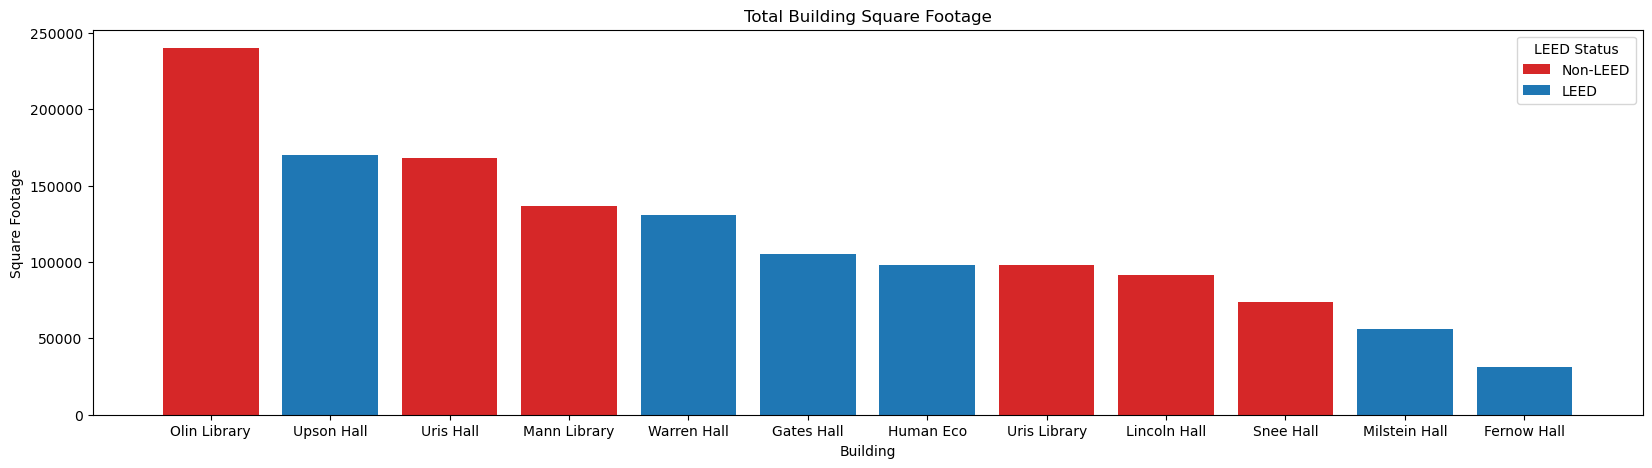

In [129]:
building_leed_sqft_df = pd.DataFrame.from_dict(leed_sqft_dict, orient="index", columns=["Square Footage"])
building_leed_sqft_df["Leed"] = "tab:blue"
building_leed_sqft_df["Label"] = "_LEED"
building_leed_sqft_df["Label"][0] = "LEED"
building_nonleed_sqft_df = pd.DataFrame.from_dict(non_leed_sqft_dict, orient="index", columns=["Square Footage"])
building_nonleed_sqft_df["Leed"] = "tab:red"
building_nonleed_sqft_df["Label"] = "_Non-LEED"
building_nonleed_sqft_df["Label"][0] = "Non-LEED"

building_sqft_df = pd.concat([building_leed_sqft_df, building_nonleed_sqft_df])
building_sqft_df = building_sqft_df.sort_values(by="Square Footage", ascending=False)

plt.figure(figsize=(20, 5))

# Plotting each of the building's total square footage for the LEED certified halls
plt.bar(building_sqft_df.index, building_sqft_df["Square Footage"], color=building_sqft_df["Leed"], label=building_sqft_df["Label"])
plt.legend(title="LEED Status")

# Add a title to the plot
plt.title('Total Building Square Footage')

# Assigning a label to the x-axis 
plt.xlabel('Building')

# Assigning a label to the y-axis
plt.ylabel('Square Footage')

# Save the figure as a PNG
plt.savefig('./OutputGraphs/building_sqft.png')

As you can see, the square footages of all buildings vary quite a bit on both the high and low ends, but many buildings are similar.  Nonetheless, the variation further emphasizes the need to normalize energy usage by square footage, as otherwise a building like Olin Library would have a misleading affect on energy usage due to it's size.

#### Mean Chilled Water and Steam Usage

We now look at the mean chilled water use and mean steam use for all buildings, not normalized. This can simply let us get a better idea of building usage, and even gain a little insight into certification standards before normalizing buildings per square footage. 

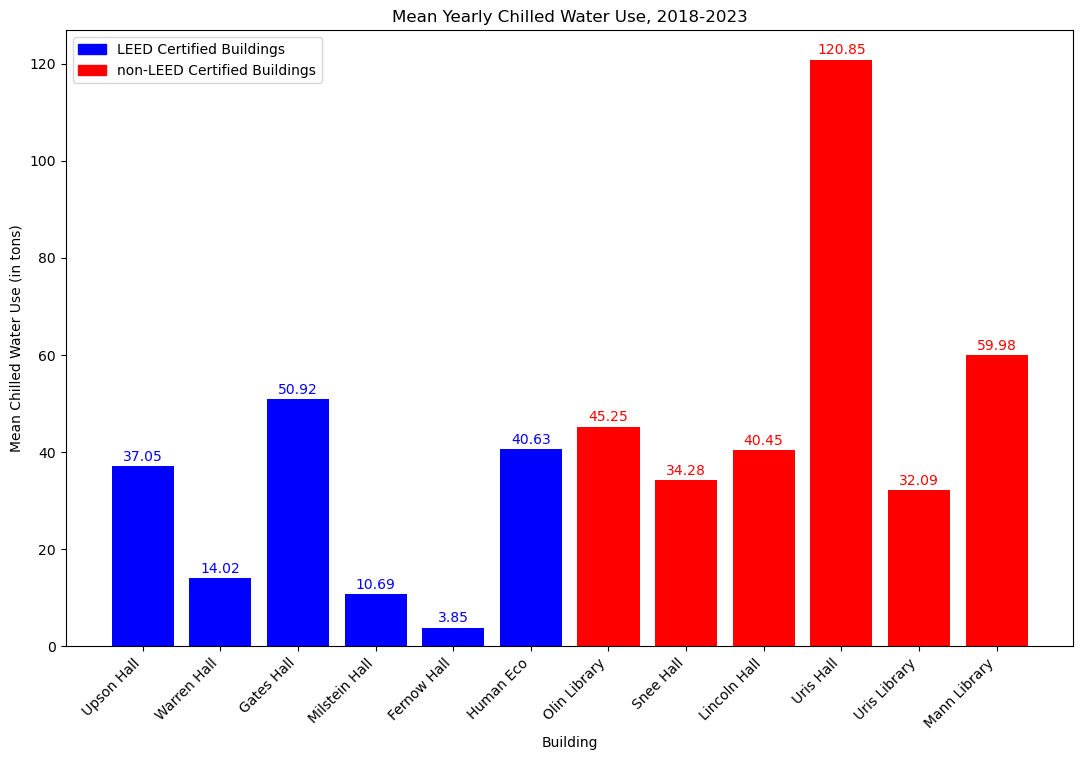

In [130]:
# Leed certified chilled water mean
leed_chilled_water_means = [np.mean(df["Chilled Water"]) for df in leed_dfs]

# Non-Leed certified chilled water mean
non_leed_chilled_water_means = [np.mean(df["Chilled Water"]) for df in non_leed_dfs]

# Dict where multiply vals by square footage again, and assigning a string for color of bar
chilled_mean_dict = {}
for name, mean in zip(list(leed_sqft_dict.keys()), leed_chilled_water_means):
    chilled_mean_dict[name] = [mean * leed_sqft_dict[name], "blue"]
    
for name, mean in zip(list(non_leed_sqft_dict.keys()), non_leed_chilled_water_means):
    chilled_mean_dict[name] = [mean * non_leed_sqft_dict[name], "red"]

meanchill_plt_values = [entry[0] for entry in chilled_mean_dict.values()]
meanchill_plt_colors = [entry[1] for entry in chilled_mean_dict.values()]

plt.figure(figsize=(13, 8))
plt.bar(list(chilled_mean_dict.keys()), meanchill_plt_values, color = meanchill_plt_colors)

# Labelling the values on top of each bar
for i, (value, color) in enumerate(zip(meanchill_plt_values, meanchill_plt_colors)):
    plt.text(i, value + 0.5, str(round(value,2)), ha='center', va='bottom', color=color)

# Labelling axes and plot title
plt.title("Mean Yearly Chilled Water Use, 2018-2023")
plt.xlabel("Building")
plt.ylabel("Mean Chilled Water Use (in tons)")

plt.xticks(rotation=45, ha='right')

colors = {'LEED Certified Buildings': 'blue', 'non-LEED Certified Buildings': 'red'}
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)


# Save the figure as a PNG
plt.savefig('./OutputGraphs/Mean_chilled_use.png')

From this plot, we can already get a sense that LEED-certified buildings seem to use less chilled water than non-LEED buildings, though we cannot say for certain since this plot does not normalize the data.  Interesting to note is that Uris Library, which was the largest building, uses less chilled water than something like Human Eco, which is mid-size.  This again indicates that normalization is necessary.

We now create a very similar plot for mean steam usage.

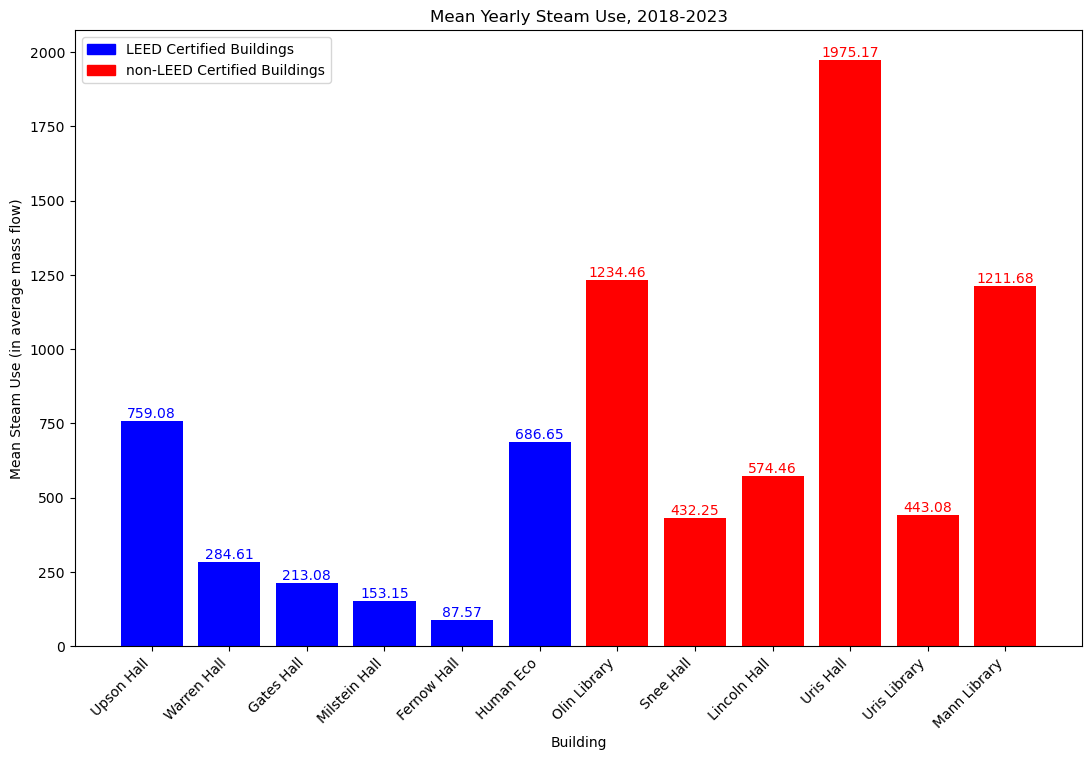

In [131]:
# Leed certified steam mean
leed_steam_means = [np.mean(df["Steam"]) for df in leed_dfs]

# Non-Leed certified steam mean
non_leed_steam_means = [np.mean(df["Steam"]) for df in non_leed_dfs]

# Dict where multiply vals by square footage again, and assigning a string for color of bar
steam_mean_dict = {}
for name, mean in zip(list(leed_sqft_dict.keys()), leed_steam_means):
    steam_mean_dict[name] = [mean * leed_sqft_dict[name], "blue"]
    
for name, mean in zip(list(non_leed_sqft_dict.keys()), non_leed_steam_means):
    steam_mean_dict[name] = [mean * non_leed_sqft_dict[name], "red"]
    
steam_plt_values = [entry[0] for entry in steam_mean_dict.values()]
steam_plt_colors = [entry[1] for entry in steam_mean_dict.values()]

plt.figure(figsize=(13, 8))
plt.bar(list(steam_mean_dict.keys()), steam_plt_values, color = steam_plt_colors)

# Labelling the values on top of each bar
for i, (value, color) in enumerate(zip(steam_plt_values, steam_plt_colors)):
    plt.text(i, value + 0.5, str(round(value,2)), ha='center', va='bottom', color=color)

# Labelling axes and plot title
plt.title("Mean Yearly Steam Use, 2018-2023")
plt.xlabel("Building")
plt.ylabel("Mean Steam Use (in average mass flow)")

plt.xticks(rotation=45, ha='right')

colors = {'LEED Certified Buildings': 'blue', 'non-LEED Certified Buildings': 'red'}
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)

plt.savefig('./OutputGraphs/Mean_steam_use.png')

The steam usage in buildings appears to follow a similar pattern as chilled water usage, with buildings like Uris Hall and Mann Library using a significant amount of steam.  This time, however, Olin Library also uses a significant amount of steam.  While this plot does not provide any conclusions for our study, it again emphasizes the need for normalization by square footage.

#### Time Series Energy v.s. Time

While we now know the average energy usage by building, we would like to see how that energy usage changes over the course of a few years.  We do this because we suspect that chilled water and steam usage would vary significantly by season, and we would thus want to only select the months where each metric is at its peak for our eventual regression.

To start, we normalize our data by dividing each building's energy usage by the square footage of the building for accuracy.  We construct our first time series graph of average chilled water consumption per square foot of the LEED buildings v.s. time.

In [132]:
def plot_timeseries(dict, dfs, metric, interval, title, xlabel, ylabel, file_output):
    plt.figure(figsize=(30, 10)) 
    
    for name, df in zip(list(dict.keys()), dfs):
        plt.plot(df['date'], df[metric], label=name)

    # Set the ticks of the x-axis to three-month intervals
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=interval))
    
    # Add a title to the plot
    plt.title(title) 
    
    # Assigning a label to the x-axis 
    plt.xlabel(xlabel) 

    # Assignning a label to the y-axis
    plt.ylabel(ylabel)
    
    # Assiging a legend to the plot 
    plt.legend() 

    # Save the figure as a PNG
    plt.savefig(file_output)

##### Chilled Water

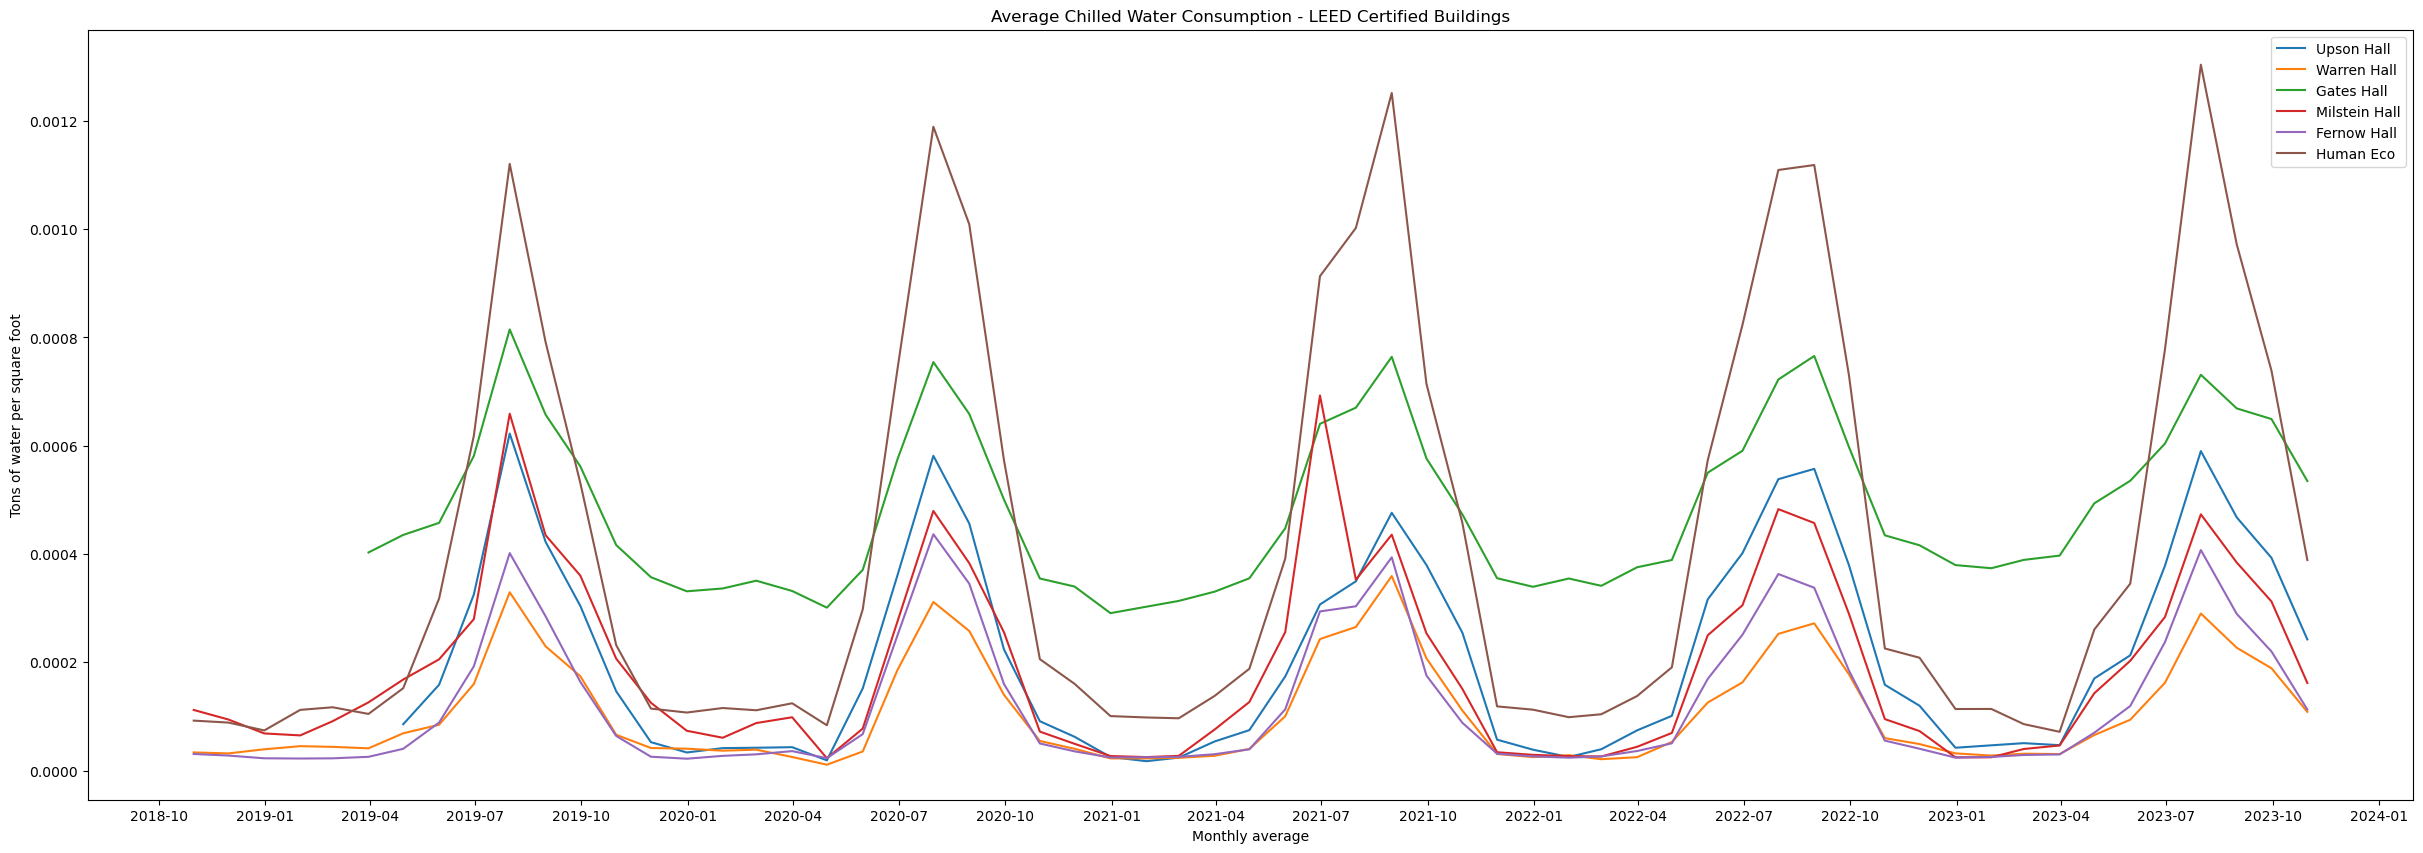

In [133]:
# Plotting each of the lines for the LEED certified hall's chilled water

plot_timeseries(leed_sqft_dict, leed_dfs, "Chilled Water", 3, "Average Chilled Water Consumption - LEED Certified Buildings",
                'Monthly average', 'Tons of water per square foot', './OutputGraphs/scaled_LEED_buildings_chilled_water.png')

We also do this for the non-Leed certified buildings

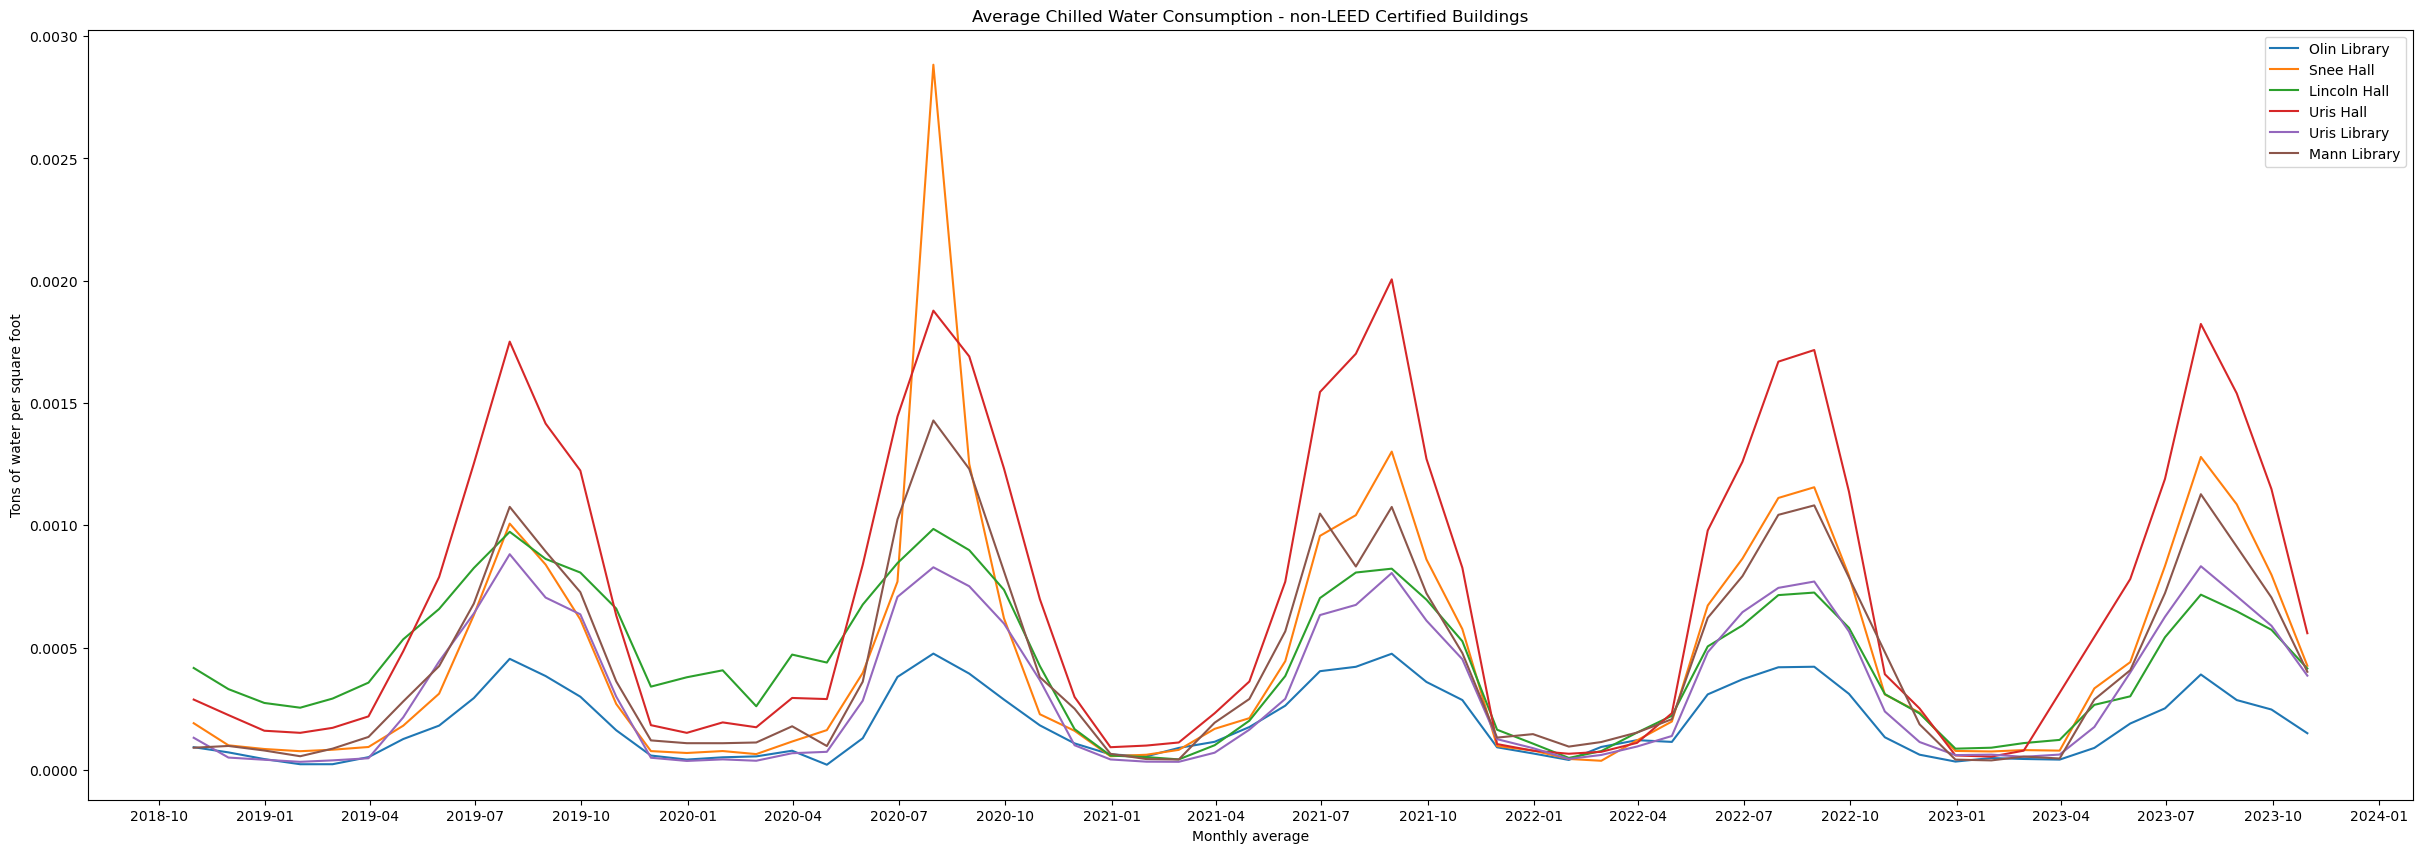

In [134]:
# Plotting each of the lines for the non-LEED hall's chilled water
plot_timeseries(non_leed_sqft_dict, non_leed_dfs, "Chilled Water", 3, "Average Chilled Water Consumption - non-LEED Certified Buildings",
                'Monthly average', 'Tons of water per square foot', './OutputGraphs/scaled_non_LEED_buildings_chilled_water.png')

Notice how, for both building types, the chilled water usage increases during the warm months and decreases during the cool months.  This is to be expected because chilled water is used to cool buildings.  This reveals that we will want to select warm months for our regression.

##### Electricity

We next look at average electricity consumption per square foot of the LEED and non-LEED certified buildings by creating a similar set of plots.

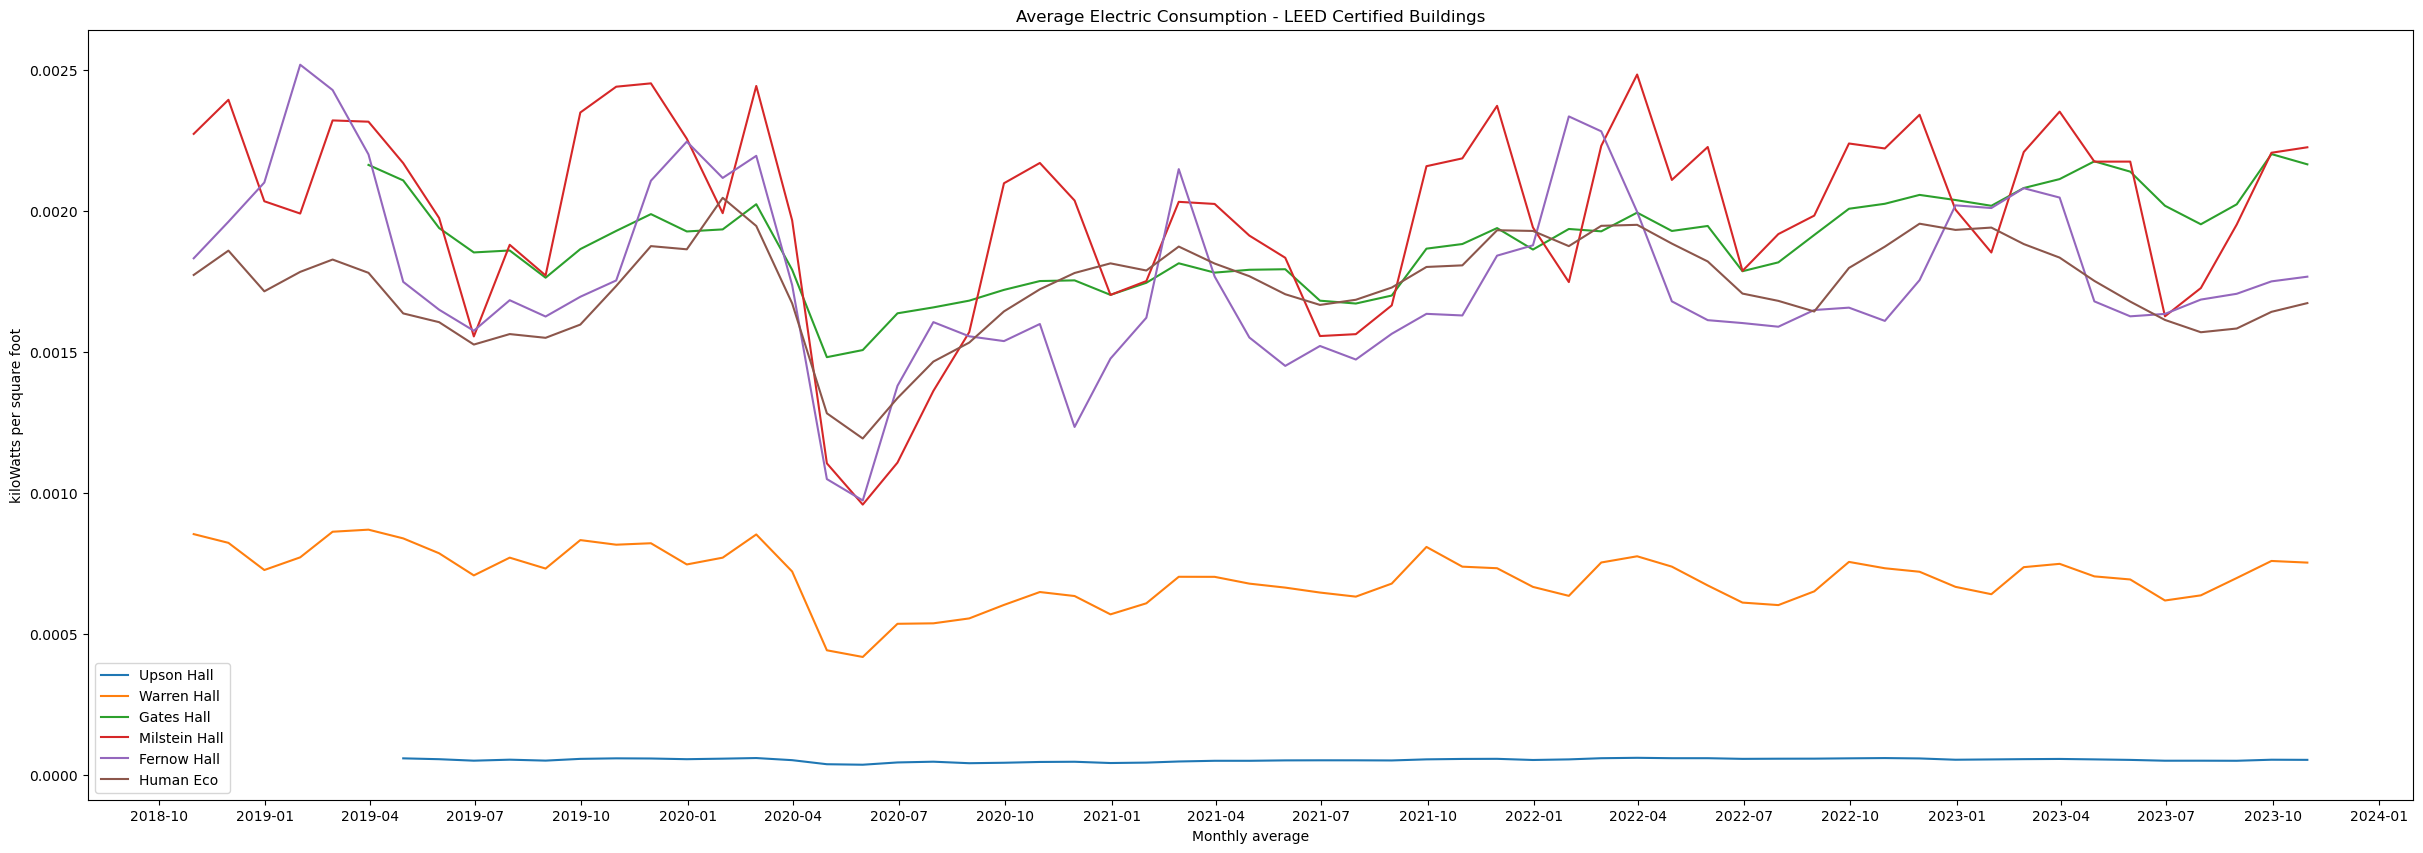

In [135]:
# Plotting each of the lines for the LEED certified hall's electric consumption
plot_timeseries(leed_sqft_dict, leed_dfs, "Electric", 3, "Average Electric Consumption - LEED Certified Buildings",
                'Monthly average', 'kiloWatts per square foot', './OutputGraphs/scaled_LEED_buildings_electric.png')

Upson Hall's electric consumption seems to be way too low but these numbers are in fact accurate. When scaled down with the square footage of the building, Upson Hall barely uses any electricity at all in comparison to other LEED-Certified buildings.

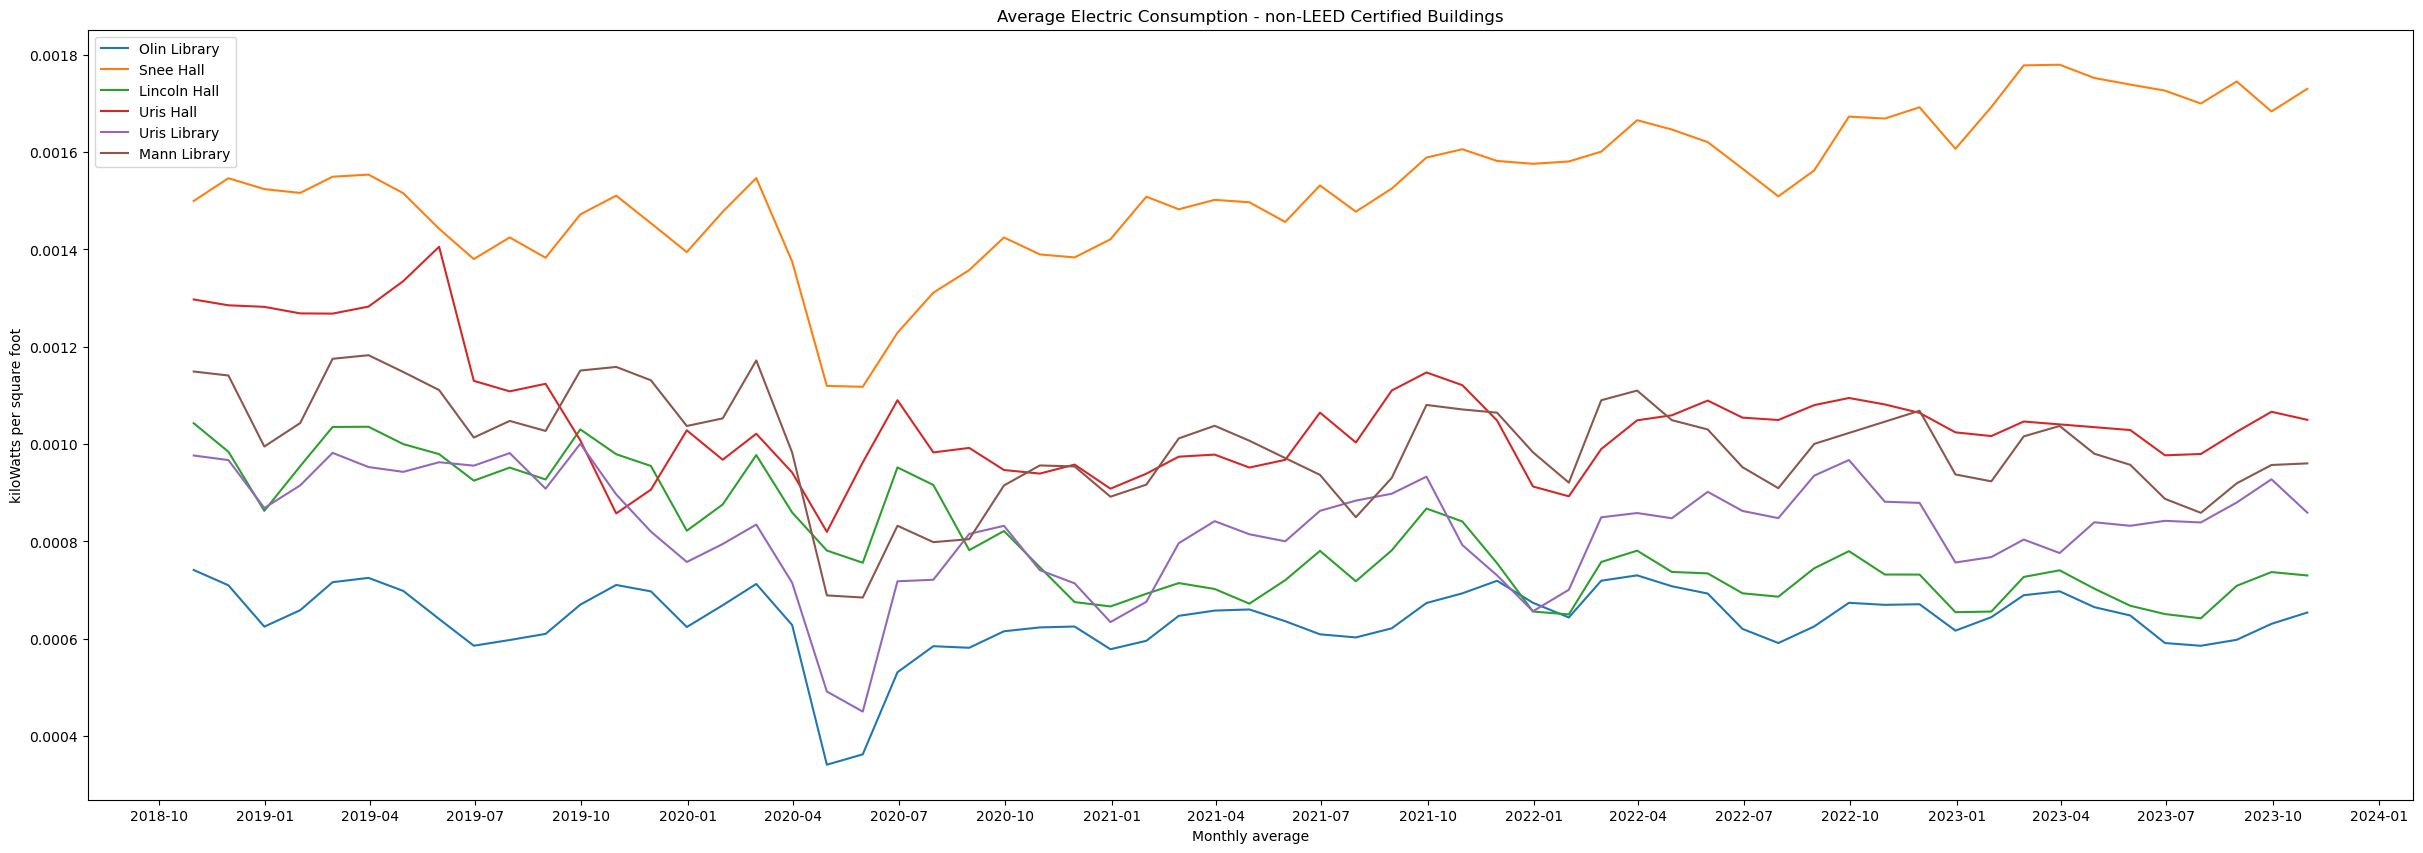

In [136]:
# Plotting each of the lines for the non-LEED hall's electric consumption
plot_timeseries(non_leed_sqft_dict, non_leed_dfs, "Electric", 3, "Average Electric Consumption - non-LEED Certified Buildings",
                'Monthly average', 'kiloWatts per square foot', './OutputGraphs/scaled_non_LEED_buildings_electric.png')

Notice how the electricity consumption stays relatively constant throughout the year without major dips and rises like with chilled water.  This is to be expected because buildings are not heated nor cooled with electricity.  Since electricity is not affected by outdoor temperature, and since most buildings on campus already utilize efficient lighting, we will no longer be including electricity data in any of our analysis.  In a future study, investigating how LEED status affects electricity could be interesting.

Also, notice the large dip in electricity from March 2020 to around mid-summer 2020.  This is very likely due to campus shutting down due to COVID-19.

##### Steam

We next look at average steam consumption per square foot of the LEED and non-LEED certified buildings by creating similar plots.

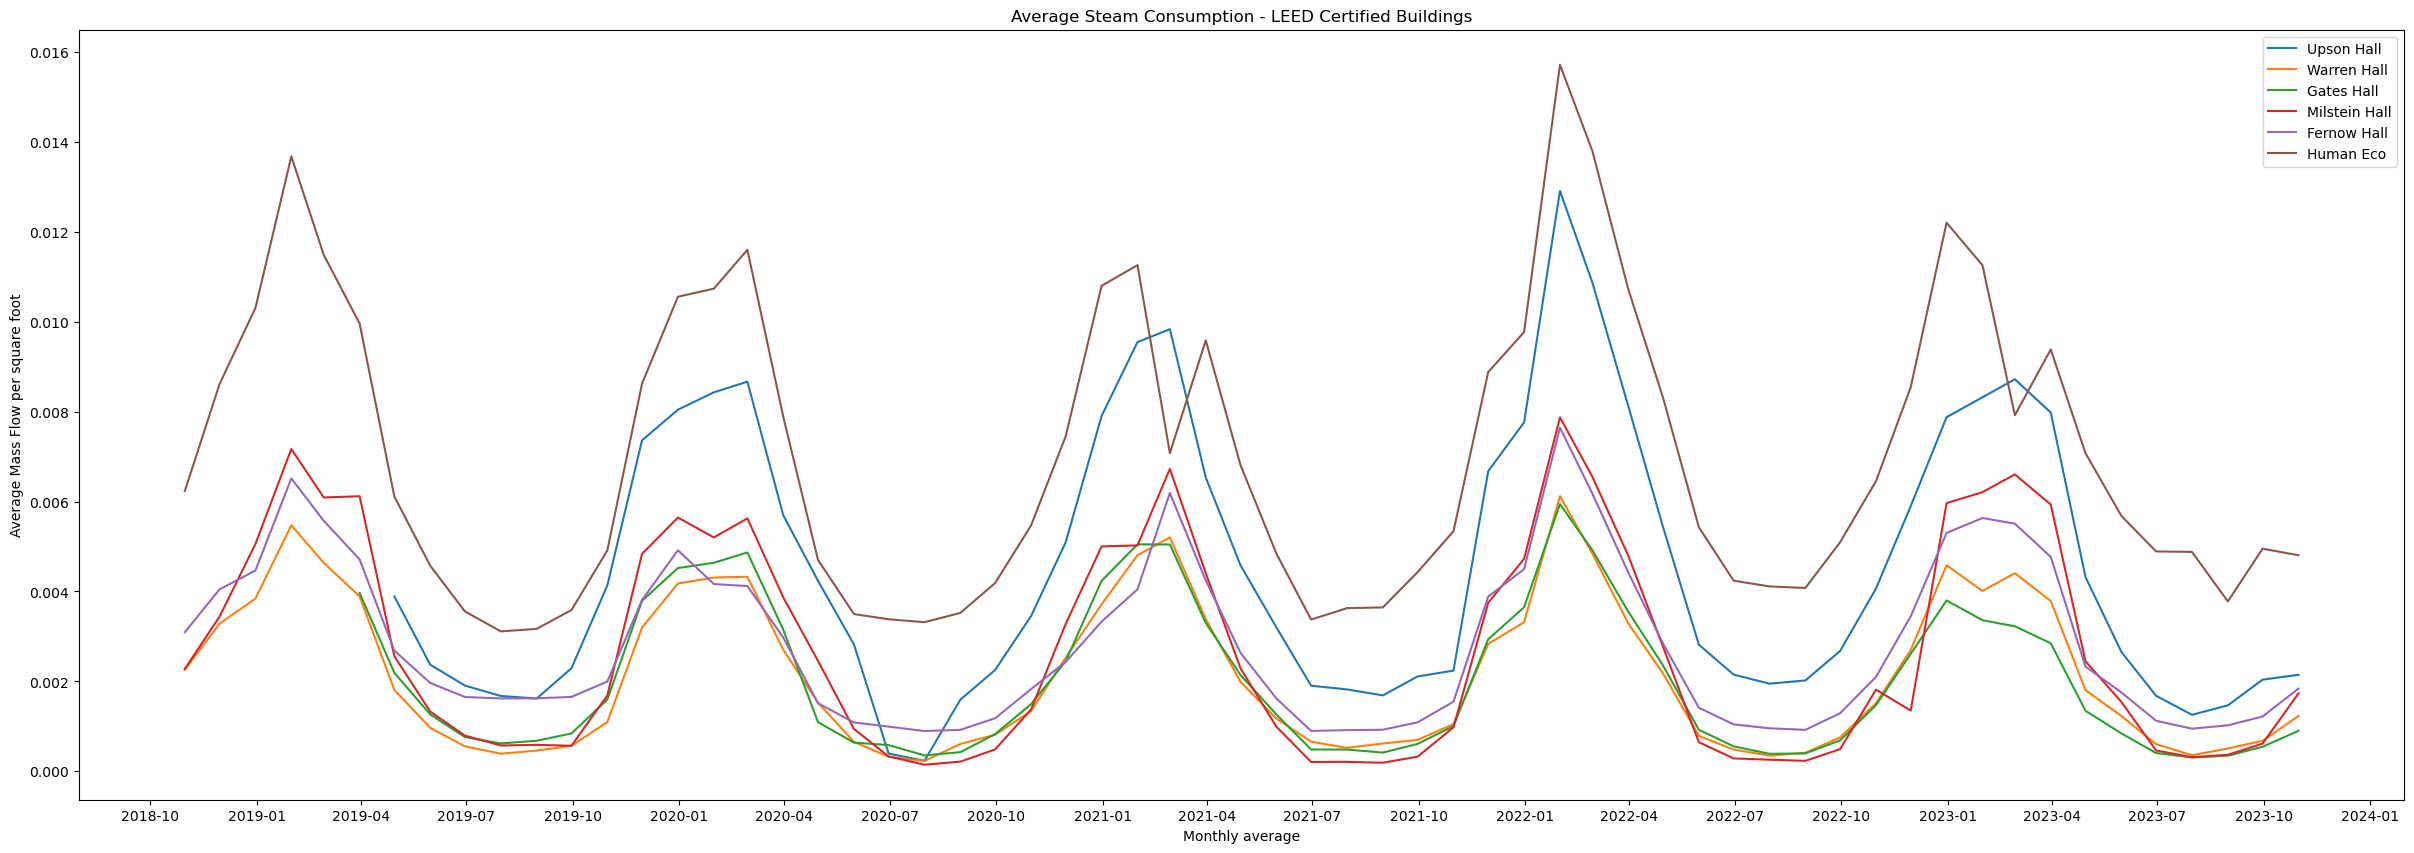

In [137]:
# Plotting each of the lines for the LEED certified hall's steam consumption
plot_timeseries(leed_sqft_dict, leed_dfs, "Steam", 3, "Average Steam Consumption - LEED Certified Buildings",
                'Monthly average', 'Average Mass Flow per square foot', './OutputGraphs/scaled_LEED_buildings_steam.png')

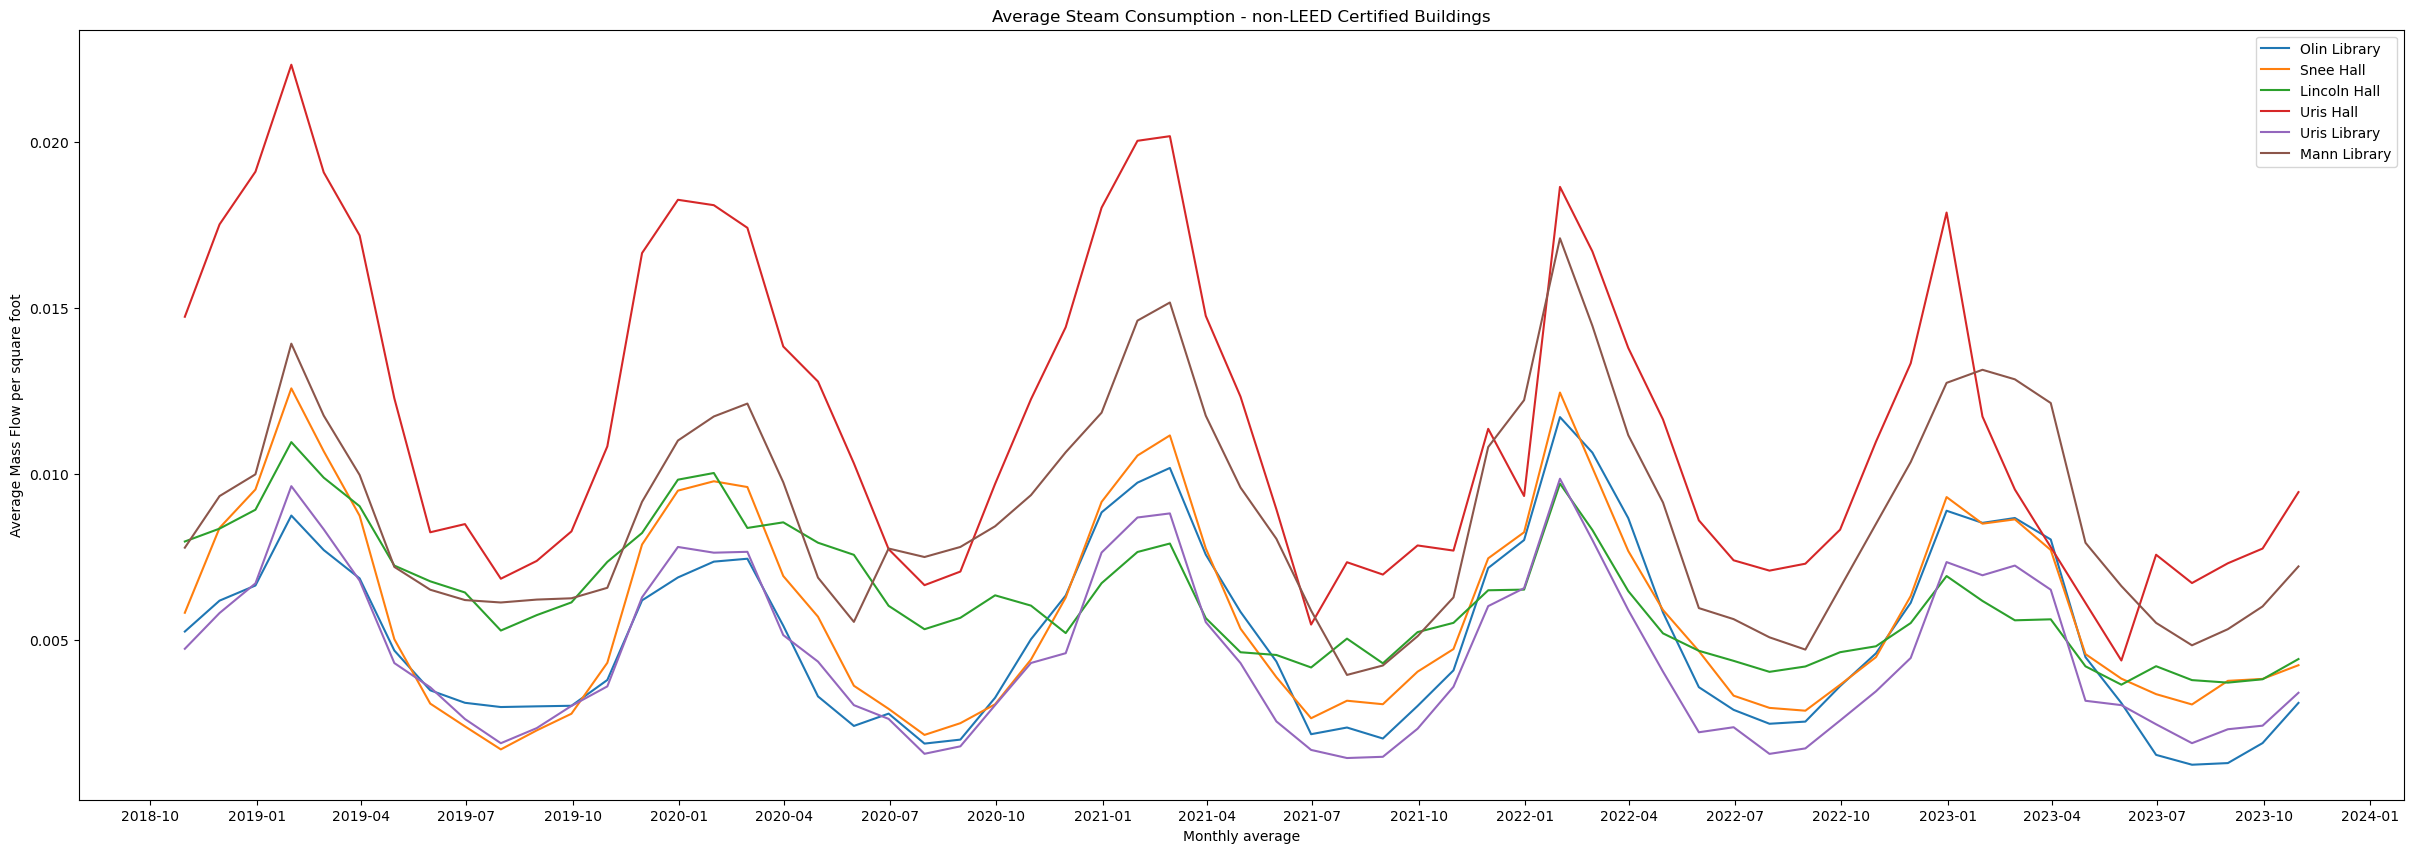

In [138]:
# Plotting each of the lines for the non-LEED hall's steam consumption
plot_timeseries(non_leed_sqft_dict, non_leed_dfs, "Steam", 3, "Average Steam Consumption - non-LEED Certified Buildings",
                'Monthly average', 'Average Mass Flow per square foot', './OutputGraphs/scaled_non_LEED_buildings_steam.png')

Notice how the steam consumption is higher in the cooler months compared to the warmer months.  This is to be expected because steam is used to heat buildings.  As such, we will want to select cool months for our regression.

#### Energy and Atmosphere Rating

LEED Buildings are classified on a point scale system. That system has different categories: Sustainable Sites, Water Efficiency, Energy & Atmosphere, Materials & Resources, Indoor Environmental Quality, Innovation & Design, and Regional Priority. Upon investigation, we learned the one that would reflect efficiency in regards to chilled water usage and steam usage is the **Energy and Atmosphere Rating**.  As such, it would be interesting to see whether LEED buildings with a higher Energy and Atmosphere rating are more efficient than those with a lower rating.

For now, we look at the distribution of points that these LEED-certified buildings obtain for the Energy and Atmosphere rating.

In [139]:
# Points in Energy and Atmosphere rating
building_to_leed_class_dict = {'Upson Hall': 'Platinum', 'Warren Hall': 'Platinum', 'Gates Hall': 'Gold', \
                               'Milstein Hall': 'Gold', 'Fernow Hall': 'Gold', 'Human Eco': 'Platinum'}
building_to_leed_eNa_points_dict = {'Upson Hall': 26 / 35, 'Warren Hall': 27/35, 'Gates Hall': 17/35, \
                                    'Milstein Hall': 9/17, 'Fernow Hall': 17/35, 'Human Eco': 13/17}

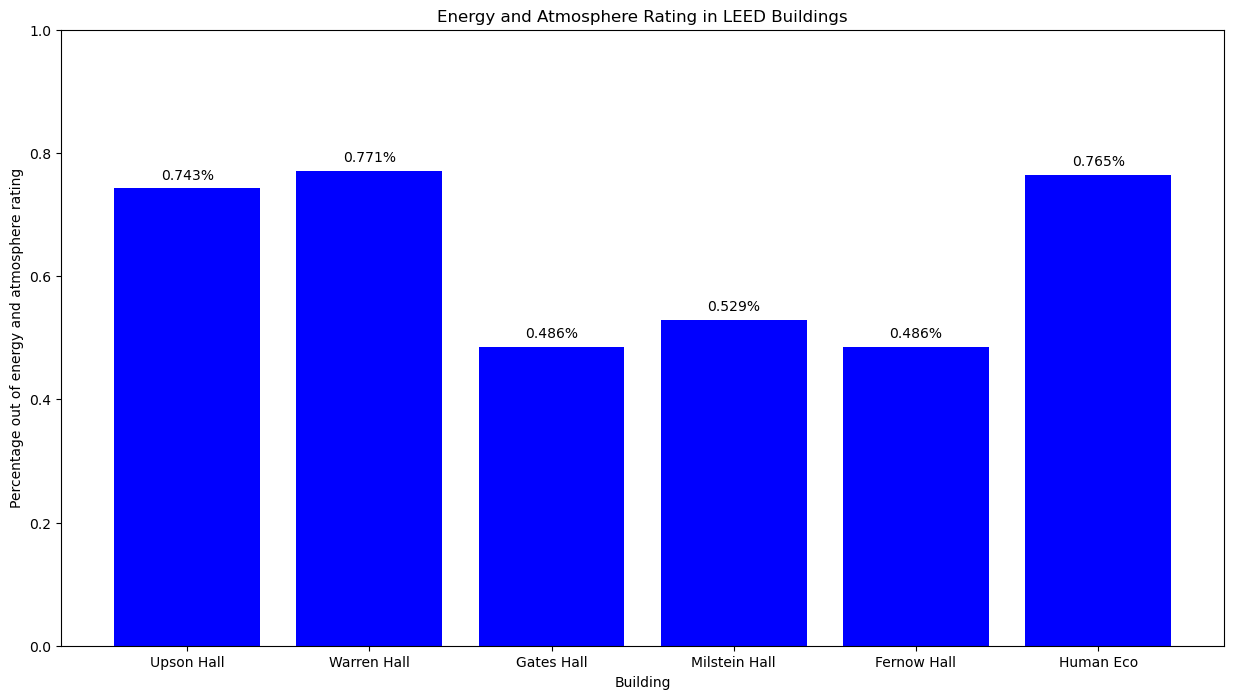

In [140]:

plt.figure(figsize=(15, 8))
plt.bar(list(building_to_leed_eNa_points_dict.keys()), list(building_to_leed_eNa_points_dict.values()), color = "blue")

for i in range(len(list(building_to_leed_eNa_points_dict.keys()))):
    plt.text(list(building_to_leed_eNa_points_dict.keys())[i], list(building_to_leed_eNa_points_dict.values())[i] \
    + .01, f'{round(list(building_to_leed_eNa_points_dict.values())[i],3)}%', ha='center', va='bottom')

plt.title('Energy and Atmosphere Rating in LEED Buildings') 
  
# Assigning a label to the x-axis 
plt.xlabel('Building') 

# Assignning a label to the y-axis
plt.ylabel('Percentage out of energy and atmosphere rating')

#Making the Y axis range from 0 to 1
plt.ylim(0, 1)

# Save the figure as a PNG
plt.savefig('./OutputGraphs/energy_and_atmos_points.png')

From this, we can see that most buildings earn an Energy and Atmosphere score of roughly between 50-75%, with a higher percentage meaning a higher score.  Further analysis of how this rating affects energy usage within the LEED buildings will be conducted later.

#### Correlations

We also want to learn more about the correlation between variables. In doing so, we notice that no matter the building, chilled water and steam have a negative correlation. This makes sense, because the more heating you need the less cooling you need and vice versa. We also learn that electricity is not strongly correlated with anything. This confirms our decision to remove electricity from this analysis.

In [141]:
print(leed_dfs[0].corr())
print(leed_dfs[1].corr())
print(non_leed_dfs[0].corr())
print(non_leed_dfs[1].corr())

                   date  Chilled Water  Electric     Steam
date           1.000000       0.156479  0.241376 -0.002565
Chilled Water  0.156479       1.000000 -0.034835 -0.801929
Electric       0.241376      -0.034835  1.000000  0.202060
Steam         -0.002565      -0.801929  0.202060  1.000000
                   date  Chilled Water  Electric     Steam
date           1.000000       0.154160 -0.255530 -0.150949
Chilled Water  0.154160       1.000000 -0.208175 -0.740726
Electric      -0.255530      -0.208175  1.000000  0.285184
Steam         -0.150949      -0.740726  0.285184  1.000000
                   date  Chilled Water  Electric     Steam
date           1.000000       0.142127  0.018958 -0.100485
Chilled Water  0.142127       1.000000 -0.239328 -0.782540
Electric       0.018958      -0.239328  1.000000  0.394174
Steam         -0.100485      -0.782540  0.394174  1.000000
                   date  Chilled Water  Electric     Steam
date           1.000000       0.170984  0.679740 -0.1618

#### EDA Conclusions

From our exploratory data analysis, we can draw a few conclusions that will inform which hypotheses we will make.  For instance, since we noticed that chilled water usage is increased in the warmer months, we will focus our linear regression for chilled water usage during the warmer months for LEED and non-LEED buildings. The same thing applies for steam usage, but in colder months. Additionally, from the large distribution of square footages, we will ensure to normalize our data by square footage before doing any analysis.

# Data Analysis and Interpretations

### Helper Functions

First, we create a function that will create a function that takes a Cornell hall DataFrame as input and populates a corresponding chilled water DataFrame with a column of LEED dummy variables. The Cornell hall DataFrame has a Date, Chilled Water, Steam, and Electric column, with the latter three corresponding to the monthly average use for the respective category.

In [142]:

def fill_chilled_water_df(hall_df, name):
    result_df =  pd.DataFrame(hall_df[hall_df["date"].dt.month.isin([ 6, 7, 8, 9])]['Chilled Water'])
    # result_df = pd.concat([result_df, pd.get_dummies(hall_df['date'].dt.month, prefix='Month')], axis=1)
    result_df['Atmosphere Energy Rating Ratio'] = [building_to_leed_eNa_points_dict[name]] * result_df.shape[0]
    return result_df

def fill_chilled_water_df_with_dummies(hall_df, is_leed):
    result_df =  pd.Series(hall_df[hall_df['date'].dt.month.isin([ 6, 7, 8, 9])]['Chilled Water']).to_frame(name='Chilled Water')
    result_df['Is_LEED'] = [1] * result_df.shape[0] if is_leed else [0] * result_df.shape[0]
    return result_df

def fill_steam_df(hall_df, name):
    result_df =  pd.DataFrame(hall_df[hall_df["date"].dt.month.isin([ 12, 1, 2, 3])]['Steam'])
    # result_df = pd.concat([result_df, pd.get_dummies(hall_df['date'].dt.month, prefix='Month')], axis=1)
    result_df['Atmosphere Energy Rating Ratio'] = [building_to_leed_eNa_points_dict[name],] * result_df.shape[0]
    return result_df

def fill_steam_df_with_dummies(hall_df, is_leed):
    result_df =  pd.Series(hall_df[hall_df['date'].dt.month.isin([ 12, 1, 2, 3])]['Steam']).to_frame(name='Steam')
    result_df['Is_LEED'] = [1] * result_df.shape[0] if is_leed else [0] * result_df.shape[0]
    return result_df




### Hypothesis I
**Preregistered Hypothesis:**
We believe that LEED certified buildings have lower normalized chilled water use (chilled water usage divided by the square footage of the building in question) than Non-LEED certified buildings during summer months (which is the peak cooling period). We opted to analyze this idea using a linear regression, using a dummy variable that signifies whether or not a building is LEED-certified or not. The output of the regression is a prediction of what the monthly chilled water usage might be for a Cornell building in the months of June, July, August, or September based on whether the building is LEED-certified or not. The non-LEED-certified dummy variable will be our reference, and we will test whether or not β_LEED < 0.


Using this function, we make a chilled water DataFrame for each one of the buildings in our analysis. This includes the following 12 halls, the first 6 of which are LEED-certified, and the final 6 of which are not: Upson Hall, Warren Hall, Gates Hall, Milstein Hall, Fernow Hall, Human Ecology Building, Uris Hall, Olin Library, Uris Library, Snee Hall, Lincoln Hall, and Mann Library. We then stack all of these DataFrames using the pandas concat() method on the horizontal axis to attain a DataFrame containing the chilled water usage monthly averages and corresponding LEED dummy values for all the buildings include in our analysis.

In [143]:
hyp1_dfs = []

#LEED DataFrames
for df in leed_dfs:
    hyp1_dfs.append(fill_chilled_water_df_with_dummies(df, is_leed=True).dropna())

#non-LEED DataFrames
for df in non_leed_dfs:
    hyp1_dfs.append(fill_chilled_water_df_with_dummies(df, is_leed=False).dropna())

chilled_water_df = pd.concat(hyp1_dfs,axis=0, ignore_index=True)

From there, we use the typical approach to a linear regression, selecting the Is_LEED column as our X or input variable, and Chilled Water column as our y or output variable. From there, we make a training and testing set for both X and y variables, before fitting the model to our training sets. Our model shows a negative coefficient for the linear regression, meaning that a building being LEED-certified is negatively associated with chilled water usage. Specifically, if a building is LEED-certified as opposed to it being not, corresponds to a decrease of normalized monthly chilled water usage of -0.00039 tons. From there, we attempt a prediction on the X test variable, which we can use to check our residuals or error variables. The residuals of the model will be analyzed in the next Markdown cell, but the RMSE and MAE will be analyzed now. The RMSE of 0.00047 and the MAE of 0.00031 are significant given the scale of the normalized chilled water usage, but it does seem as if our data has some outliers, which might stretch these error values upwards.

In [144]:
X = chilled_water_df[['Is_LEED']]
y = chilled_water_df['Chilled Water']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15,random_state=2950)

print(X_train.shape)

model = LinearRegression().fit(X_train, y_train)

print("Our model's coefficient is the following: " + str(model.coef_[0]))

y_pred = model.predict(X_test)

ols_model = sm.OLS(X_train, y_train)
result = ols_model.fit()
print(f"Model's P-value: {result.pvalues[0]}")

rmse = mean_squared_error(y_test, y_pred, squared=False)
print('Root Mean Squared Error on Test Set: '+ str(rmse))

mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error on Test Set: ' + str(mae))




(203, 1)
Our model's coefficient is the following: -0.00038003367181166115
Model's P-value: 1.1514523666432152e-10
Root Mean Squared Error on Test Set: 0.0004629899605111199
Mean Absolute Error on Test Set: 0.0002929185855850873


**Evaluation of Significance 1:** The Null hypothesis that there is no correlation between chilled water usage and a building being LEED is false. We can reject the null because our p-value is <0.05.


The residuals are calculated by the subtracting the predictions we made using our model from the actual y values from the test set.

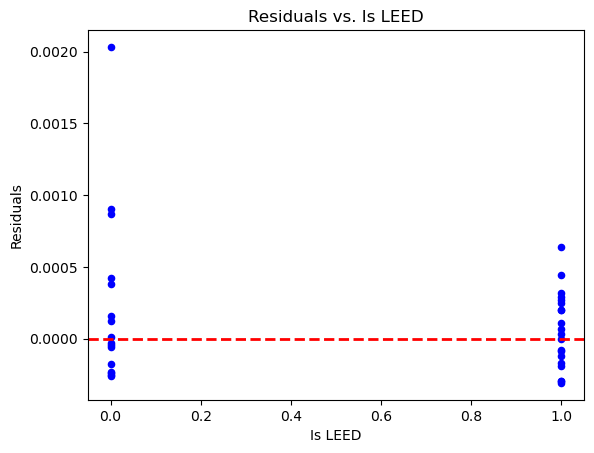

In [145]:
residuals = y_test - y_pred

plt.scatter(X_test['Is_LEED'], residuals, color='blue', s=20)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Is LEED')
plt.ylabel('Residuals')
plt.title('Residuals vs. Is LEED')
plt.show()

We see two "columns" of residuals plotted on the residual plot, which is expected due to the dummy variable only having the possible values of 0.0 or 1.0, based on whether or not a building isn't LEED-certified, or if it is, respectively. With the exception of some notable outliers in the residual cluster when Is_LEED is 0.0, the linear regression does a decent job of making predictions relatively close to actual values.

The final code block below displays a best fit line from our model, and the one that Seaborn's regplot() bootstrap function calculates for us. As we can see from the graphs, our model shows a negative relationship between a building being LEED (as opposed to non-LEED) and the monthly average chilled water usage in the summer months. This indicates that a building being LEED generally corresponds to less chilled water use, which satisfies our hypothesis.  Furthermore, as shown in the similarity in values between our model's slope and intercept and that of Seaborn's bootstrapped model, it seems as if our model is rather accurate and this bootstrapped model has small confidence intervals.

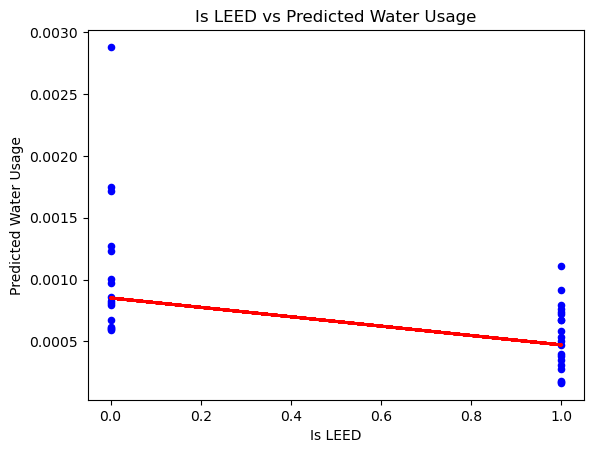

Our model's regression's slope is: -0.00038003367181166115
Our model's regression's intercept is: 0.0008508340507728943
Seaborn's regression's slope is: -0.0003996332162763877
Seaborn's regression's intercept is: 0.0008810620772034942


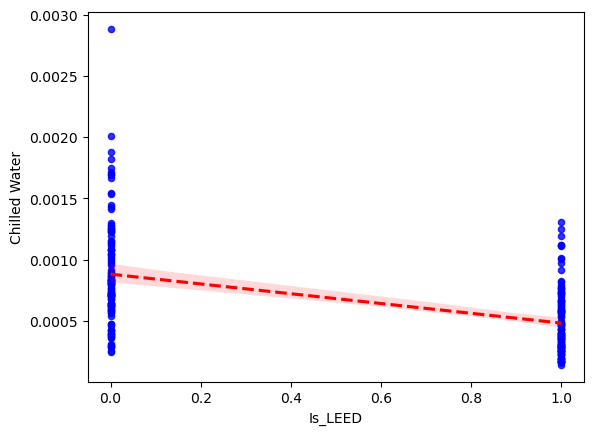

In [146]:
plt.scatter(X_test['Is_LEED'], y_test, color='blue', s=20)
plt.plot(X_test['Is_LEED'], model.coef_[0] * X_test['Is_LEED'] + model.intercept_, linestyle='--', color='red', linewidth=2)
plt.xlabel('Is LEED')
plt.ylabel('Predicted Water Usage')
plt.title('Is LEED vs Predicted Water Usage')
plt.show()


ax = sns.regplot(x='Is_LEED', y='Chilled Water', data=chilled_water_df, n_boot=30, scatter_kws={"color": "blue", "s": 20}, \
                 line_kws={"color": "red", 'linestyle':'--'})
slope, intercept, _, ax, _ = scipy.stats.linregress(x=ax.get_lines()[0].get_xdata(),
                                                       y=ax.get_lines()[0].get_ydata())

print("Our model's regression's slope is: " + str(model.coef_[0]))
print("Our model's regression's intercept is: " + str(model.intercept_))
print("Seaborn's regression's slope is: " + str(slope))
print("Seaborn's regression's intercept is: " + str(intercept))


### Hypothesis 2
**Preregistered Hypothesis:**
During summer months (peak cooling period), buildings with higher normalized chilled water usage are more likely to be LEED-certified buildings than non-LEED-certified buildings.

Analysis: Logistic regression. The input is the normalized chilled water metric, and the output is a probability of it being a LEED-certified building. We will set a decision threshold at y = 0.5; any number above 0.5 will be categorized as LEED-certified and any number below or equal to 0.5 will be categorized as non-LEED-certified.

The codeblock is the executing of the logistic regression. We use the dataframe chilled_water_df from the above hypothesis and reassign it to logistic_chilled_df, and create a test train split with that. We then fit the logistic regression, and calculate the probabilities that a given value corresponds to a LEED building or not. Then, we print the model's coefficient to interpret, and we graph the logistic regression with hue equal to the probability of it being a LEED building. 

Model's P-value: 1.4488276824330263e-09
The model's Chilled Water coefficient is -0.02


[Text(0.5, 0, 'Normalized Chilled Water Use'), Text(0, 0.5, 'Is Leed Binary')]

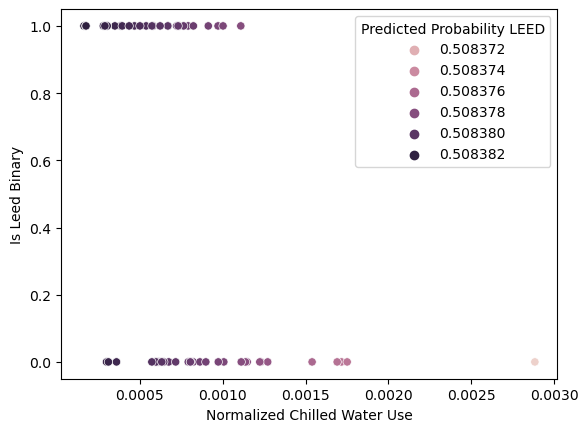

In [147]:

logistic_chilled_water_df = chilled_water_df
x_logistic = logistic_chilled_water_df[["Chilled Water"]]
y_logistic = logistic_chilled_water_df["Is_LEED"]

X_train, X_test, y_train, y_test = train_test_split(x_logistic, y_logistic, random_state=2950)


chilled_water_logistic_model = LogisticRegression().fit(X_train, y_train)
log_preds = chilled_water_logistic_model.predict_proba(X_test)[:, 1]

ols_model = sm.OLS(y_train, X_train)
result = ols_model.fit()
print(f"Model's P-value: {result.pvalues[0]}")

X_test_reset = X_test.reset_index(drop=True)
y_test_reset = y_test.reset_index(drop=True)

df_test = pd.concat([X_test_reset, y_test_reset, pd.Series(log_preds, name='Predicted Probability LEED')], axis=1)

coeffs= chilled_water_logistic_model.coef_[0].round(2)
print(f"The model's Chilled Water coefficient is {coeffs[0]}")

sns.scatterplot(df_test, x = "Chilled Water", y= "Is_LEED", hue = "Predicted Probability LEED").set(xlabel = "Normalized Chilled Water Use",\
                                                                                                    ylabel = "Is Leed Binary")



**Evaluation of Significance 2:** The Null hypothesis would be that higher chilled water usage is not related to lower probability that a building is LEED Certified. We can reject the null, because our p value is much smaller than 0.05.


Unfortunately, this graph was not very helpful in predicting whether our building is LEED certified or not. To address this, we add another variable to the logistic regression to see if it would be more accurate and print more useful results. We added the Steam usage variable, and kept the rest of the model the same. We print the coefficients of each variable to learn more about their relationship with influencing the probability.

In [148]:
hyp2_dfs = []

#LEED DataFrames
for df in leed_dfs:
    hyp2_dfs.append(fill_steam_df_with_dummies(df, is_leed=True).dropna())

#non-LEED DataFrames
for df in non_leed_dfs:
    hyp2_dfs.append(fill_steam_df_with_dummies(df, is_leed=False).dropna())

steam_df = pd.concat(hyp2_dfs,axis=0, ignore_index=True)


logistic_water_steam_df = chilled_water_df.drop("Is_LEED", axis=1)
logistic_water_steam_df = pd.concat([logistic_water_steam_df, steam_df], axis=1, ignore_index=False)
logistic_water_steam_df.dropna(inplace=True)

x_logistic = logistic_water_steam_df[["Chilled Water", "Steam"]]
y_logistic = logistic_water_steam_df["Is_LEED"]

X_train, X_test, y_train, y_test = train_test_split(x_logistic, y_logistic, random_state=2950)


water_steam_logistic_model = LogisticRegression().fit(X_train, y_train)
log_preds = water_steam_logistic_model.predict_proba(X_test)[:, 1]

ols_model = sm.OLS(y_train, X_train)
result = ols_model.fit()
print(f"Model's P-values: {result.pvalues.values}")

X_test_reset = X_test.reset_index(drop=True)
y_test_reset = y_test.reset_index(drop=True)

df_test = pd.concat([X_test_reset, y_test_reset, pd.Series(log_preds, name='Predicted Probability LEED')], axis=1)

coeffs= water_steam_logistic_model.coef_[0].round(2)
print(f"The model's Chilled Water coefficient is {coeffs[0]}")
print(f"The model's Steam coefficient is {coeffs[1]}")




Model's P-values: [4.11578689e-01 4.30889929e-05]
The model's Chilled Water coefficient is -0.02
The model's Steam coefficient is -0.17


**Evaluation of Significance 2.1:** The Null Hypotheses would be that Chilled water usage is not associated with probability of a building being LEED certified, and that Steam usage is not associated with probability of a building being LEED certified either. We cannot reject the Null hypothesis for chilled water usage, because p-value is >0.05, but we can reject the null for steam usage under the same pretense

### Hypothesis 3  
**Preregistered Hypothesis:**
Among the LEED certified buildings, we predict that the higher the energy and atmosphere LEED rating ratio, the lower the average chilled water usage. This analysis will be done via a linear regression, which takes in the energy and atmosphere rating ratio of some LEED-certified building, as well as some of the months of the year (which is represented by a set of 12 dummy variables, which will have 1.0 values if the row in question is of that month, and a 0.0 if not) as input. The output of the regression is a prediction of what the monthly chilled water usage might be.

This model will then return the predicted chilled water usage, based on those inputs. We will then attempt to see if β_rating < 0.

Using the fill_chilled_water_df() function, we make a chilled water DataFrame for each one of the LEED-certified buildings in our analysis. This includes the following 6 halls: Upson Hall, Warren Hall, Gates Hall, Milstein Hall, Fernow Hall, and Human Ecology Building. We then stack these DataFrames using the pandas concat() method on the horizonrtal axis to get a DataFrame that contains the chilled water usage monthly averages, as well as 12 dummy columns which indicate what month it is depending on which one of these dummy columns has a 1 value in it.

In [149]:
hyp3_dfs = []

for name, df in zip(list(leed_sqft_dict.keys()), leed_dfs):
    hyp3_dfs.append(fill_chilled_water_df(df, name).dropna())

leed_chilled_water_df = pd.concat(hyp3_dfs, axis=0, ignore_index=True)

From there, we once again use the typical approach to a linear regression, using multiple columns as input this time. We will however omit the Chilled Water and January columns, given that we will be predicting Chilled Water outputs and we need a reference variable in order to properly conduct the linear regression with dummy values. These multiple columns of the DataFrame will comprise our X term, or input, and the Chilled Water column will comprise our y column, or output. From there, we make a training and testing set for both X and y variables, before fitting the model to our training sets. Our model shows a positive coefficient for the linear regression, meaning 
that a LEED-certified building's energy and atmosphere rating ratio is positively correlated with monthly chilled water usage, taking the month into account.

This does not support our hypothesis, which was that a higher energy and atmosphere rating would correspond to lower chilled water usage.  This could be due to the fact that the energy and atmosphere ratings correspond to many more things than just energy efficiency, so higher ratings may not always necessarily correspond to lower chilled water usage.

From there, we attempt a prediction on the X test variable, which we can use to check our residuals or error variables.

In [150]:
# X = leed_chilled_water_df.drop(['Chilled Water', 'Month_1'], axis=1)
X = leed_chilled_water_df.drop('Chilled Water', axis=1)
y = leed_chilled_water_df['Chilled Water']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=2950)

model = LinearRegression().fit(X_train, y_train)

ols_model = sm.OLS(y_train, X_train)
result = ols_model.fit()
print(f"Model's P-value: {result.pvalues.values}")

y_pred = model.predict(X_test)

print("Our model's coefficient is the following: " + str(model.coef_))

rmse = mean_squared_error(y_test, y_pred, squared=False)
print('Root Mean Squared Error on Test Set: '+ str(rmse))

mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error on Test Set: ' + str(mae))

Model's P-value: [5.25704849e-33]
Our model's coefficient is the following: [0.00028041]
Root Mean Squared Error on Test Set: 0.0002475953626873499
Mean Absolute Error on Test Set: 0.00020155667120611963


**Evaluation of Significance 3:** The null hypothesis would here is that there is no correlation between a LEED certified building's energy and atmosphere rating and the buildings chilled water use. However, because our p-values is less than 0.05, we can reject the null hypothesis. This entails that there is a relationship between the two, depicted by the the models coefficient of 0.0002.

The residuals are calculated by the subtracting the predictions we made using our model from the actual y values from the test set. We see four "columns" of residuals plotted on the residual plot, which is expected due to there being 6 LEED-certified buildings, two of which have the same rating ratio (meaning that they overlap). With the exception of some notable outliers in the fourth residual "cluster," the model tends to not have too much error.

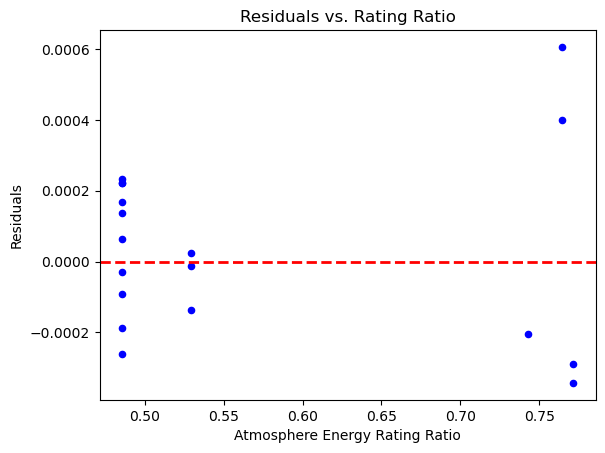

In [151]:
residuals = y_test - y_pred
plt.scatter(X_test['Atmosphere Energy Rating Ratio'], residuals, color='blue', s=20)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Atmosphere Energy Rating Ratio')
plt.ylabel('Residuals')
plt.title('Residuals vs. Rating Ratio')
plt.show()



The final code block below displays a best fit line from our model, and the one that Seaborn's regplot() function calculates for us. As we can see from the graphs, our model shows a positive relationship between a building having a higher energy and atmosphere rating ratio and the monthly average chilled water usage as a whole.  This is not what we expected given our domain knowledge.

However, the best-fit-lines for Seaborn are not completely accurate, it takes into account the dummy variables created for all months, since Seaborn can only accept singular inputs in its regplot() function.

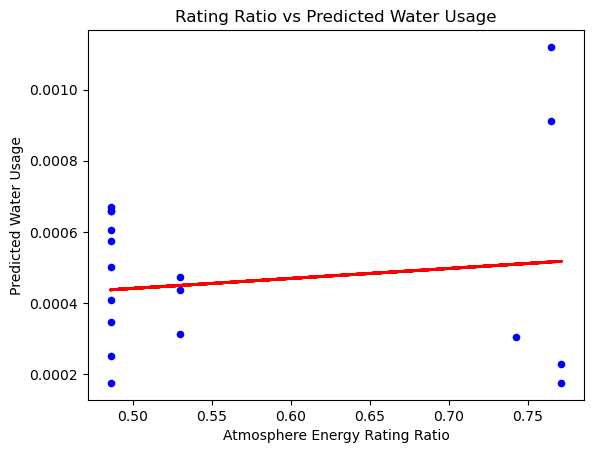

Our model's regression's slope is: 0.00028041386817831643
Our model's regression's intercept is: 0.00030045608286431225
Seaborn's regression's slope is: 0.0002641574886031864
Seaborn's regression's intercept is: 0.00031501704247652806


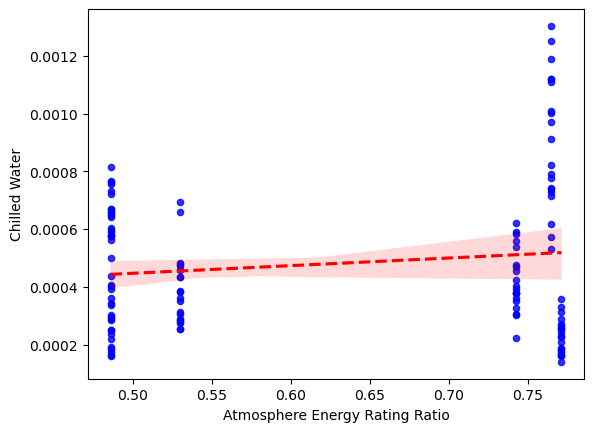

In [152]:
plt.scatter(X_test['Atmosphere Energy Rating Ratio'], y_test, color='blue', s=20)
plt.plot(X_test['Atmosphere Energy Rating Ratio'], model.coef_[0] * X_test['Atmosphere Energy Rating Ratio'] + \
         model.intercept_, linestyle='--', color='red', linewidth=2)
plt.xlabel('Atmosphere Energy Rating Ratio')
plt.ylabel('Predicted Water Usage')
plt.title('Rating Ratio vs Predicted Water Usage')
plt.show()

ax = sns.regplot(x='Atmosphere Energy Rating Ratio', y='Chilled Water', data=leed_chilled_water_df, n_boot=30, \
                 scatter_kws={"color": "blue", "s": 20}, line_kws={"color": "red", 'linestyle':'--'})
slope, intercept, _, ax, _ = scipy.stats.linregress(x=ax.get_lines()[0].get_xdata(),
                                                       y=ax.get_lines()[0].get_ydata())

print("Our model's regression's slope is: " + str(model.coef_[0]))
print("Our model's regression's intercept is: " + str(model.intercept_))
print("Seaborn's regression's slope is: " + str(slope))
print("Seaborn's regression's intercept is: " + str(intercept))

### Hypothesis 3.1

Including the dummy variables related to the months should in theory have some effect on our best-fit line, which prompted us to rerun the linear regression while including the dummy variables in the X variable that serves as input to our linear regression. Thus, although we had to copy some code in order to do it, we decided to rerun the analysis with a multivariable input.

Our model's coefficient is the following: [-7.56950326e-07  1.59133296e-05  3.69677710e-05  1.19167308e-04
  2.98760151e-04  4.82870016e-04  4.32767716e-04  2.64949152e-04
  7.65766791e-05  1.90420628e-05 -1.20432502e-05 -9.35260808e-05]


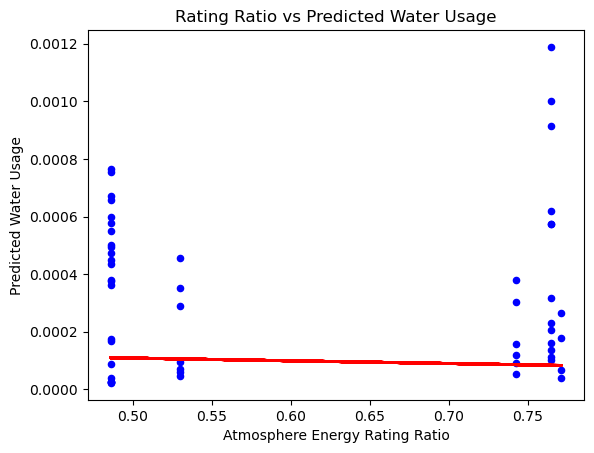

In [153]:
def fill_chilled_water_df_for_hyp31(hall_df, name):
    result_df =  pd.DataFrame(hall_df['Chilled Water'])
    result_df = pd.concat([result_df, pd.get_dummies(hall_df['date'].dt.month, prefix='Month')], axis=1)
    result_df['Atmosphere Energy Rating Ratio'] = [building_to_leed_eNa_points_dict[name]] * result_df.shape[0]
    return result_df

hyp31_dfs = []

for name, df in zip(list(leed_sqft_dict.keys()), leed_dfs):
    hyp31_dfs.append(fill_chilled_water_df_for_hyp31(df, name).dropna())

leed_chilled_water_df_31 = pd.concat(hyp31_dfs, axis=0, ignore_index=True)


X_31 = leed_chilled_water_df_31.drop(['Chilled Water', 'Month_1'], axis=1)
y_31 = leed_chilled_water_df_31['Chilled Water']

X_train_31, X_test_31, y_train_31, y_test_31 = train_test_split(X_31, y_31, test_size=0.15, random_state=2950)

model_31 = LinearRegression().fit(X_train_31, y_train_31)


y_pred_31 = model_31.predict(X_test_31)

print("Our model's coefficient is the following: " + str(model_31.coef_))

plt.scatter(X_test_31['Atmosphere Energy Rating Ratio'], y_test_31, color='blue', s=20)
plt.plot(X_test_31['Atmosphere Energy Rating Ratio'], model_31.coef_[11] * \
         X_test_31['Atmosphere Energy Rating Ratio'] + model_31.intercept_, linestyle='--', color='red', linewidth=2)
plt.xlabel('Atmosphere Energy Rating Ratio')
plt.ylabel('Predicted Water Usage')
plt.title('Rating Ratio vs Predicted Water Usage')
plt.show()

Incorporating the Dummy Variables of months into the linear regression changed our output significantly.  Now, as the rating increases, chilled water usage decreases, which is what we expected.

We can contrast this with the plot we saw before:

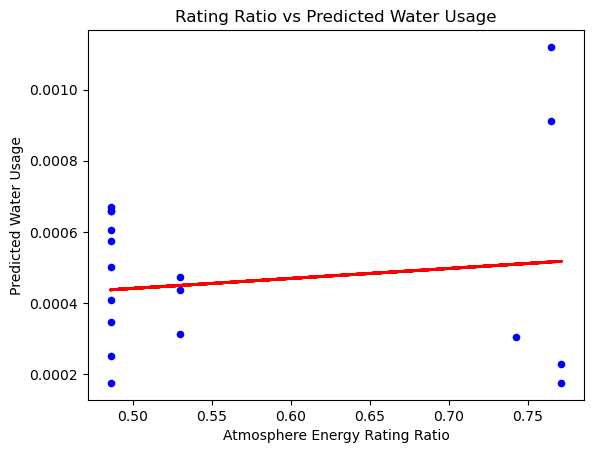

In [154]:
plt.scatter(X_test['Atmosphere Energy Rating Ratio'], y_test, color='blue', s=20)
plt.plot(X_test['Atmosphere Energy Rating Ratio'], model.coef_[0] * X_test['Atmosphere Energy Rating Ratio'] + \
         model.intercept_, linestyle='--', color='red', linewidth=2)
plt.xlabel('Atmosphere Energy Rating Ratio')
plt.ylabel('Predicted Water Usage')
plt.title('Rating Ratio vs Predicted Water Usage')
plt.show()

In future studies, we can conduct a similar analysis with Steam.

### Hypothesis 4

We believe that LEED certified buildings have lower normalized steam use (steam usage divided by the square footage of the building in question) than Non-LEED certified buildings during the winter months (which is the peak heating period). We opted to analyze this idea using a linear regression, using a dummy variable that signifies whether or not a building is LEED-certified or not. The output of the regression is a prediction of what the monthly chilled water usage might be for a Cornell building in the months of December, January, February, or March based on whether the building is LEED-certified or not. The non-LEED-certified dummy variable will be our reference, and we will test whether or not β_LEED < 0.

Using this function, we make a steam DataFrame for each one of the buildings in our analysis, similar to how we do it for hypothesis I.

In [155]:
hyp4_dfs = []

#LEED DataFrames
for df in leed_dfs:
    hyp4_dfs.append(fill_steam_df_with_dummies(df, is_leed=True).dropna())

#non-LEED DataFrames
for df in non_leed_dfs:
    hyp4_dfs.append(fill_steam_df_with_dummies(df, is_leed=False).dropna())

steam_df = pd.concat(hyp4_dfs,axis=0, ignore_index=True)

From there, we use the typical approach to a linear regression, selecting the Is_LEED column as our X or input variable, and Steam column as our y or output variable. From there, we make a training and testing set for both X and y variables, before fitting the model to our training sets.

Our model shows a negative coefficient for the linear regression, meaning that a building being LEED-certified is negatively associated with steam usage. Specifically, if a building is LEED-certified as opposed to it being not, corresponds to a decrease of normalized monthly steam usage of -0.0044067 mass flow units.

The RMSE of 0.003586 and the MAE of 0.002782 are significant given the scale of the normalized steam usage, but it does seem as if our data has some outliers, which might stretch these error values upwards.

In [156]:
X = steam_df.drop('Steam', axis=1)
y = steam_df['Steam']


X_train, X_test, y_train, y_test = train_test_split(X, y ,random_state=42)

model = LinearRegression().fit(X_train, y_train)

print("Our model's coefficient is the following: " + str(model.coef_[0]))

ols_model = sm.OLS(y_train, X_train)
result = ols_model.fit()
print(f"Model's P-value: {result.pvalues.values}")


y_pred = model.predict(X_test)

rmse = mean_squared_error(y_test, y_pred, squared=False)
print('Root Mean Squared Error on Test Set: '+ str(rmse))

mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error on Test Set: ' + str(mae))

Our model's coefficient is the following: -0.0044067168032942885
Model's P-value: [3.07017394e-11]
Root Mean Squared Error on Test Set: 0.0035862570364853254
Mean Absolute Error on Test Set: 0.002782212621530844


**Evaluation of Significance 4:** The null hypothesis is that there is no correlation between leed certification status and steam use in winter months. We can reject this null hypothesis because our p-value is much lower than 0.05, which means that there is correlation between the two variables, depicted by the model's coefficient of -0.0044067.

We then calculate our residuals, and like hypothesis I, we see two "columns" of residuals plotted on the residual plot, which is expected due to the dummy variable only having the possible values of 0.0 or 1.0, based on whether or not a building isn't LEED-certified.

There appears to be more outliers, especially in the non-LEED buildings, here compared to the chilled water usage in Hypothesis I.  This may be because 1) heating systems need to work much harder than A/C systems in Ithaca, so any outliers have more of a noticeable effect and 2) heating systems and insulation in non-LEED buildings can vary much more than in non-LEED buildings.

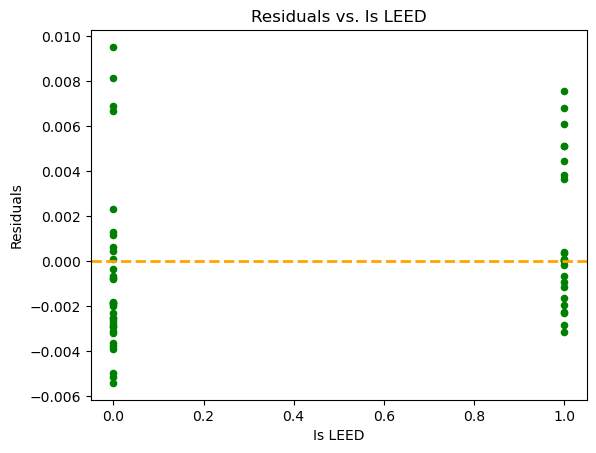

In [157]:
residuals = y_test - y_pred

plt.scatter(X_test['Is_LEED'], residuals, color='green', s=20)
plt.axhline(y=0, color='orange', linestyle='--', linewidth=2)
plt.xlabel('Is LEED')
plt.ylabel('Residuals')
plt.title('Residuals vs. Is LEED')
plt.show()

The final code block below displays a best fit line from our model, and the one that Seaborn's regplot() function calculates for us. As we can see from the graphs, our model shows a negative relationship between a building being LEED (as opposed to non-LEED) and the monthly average steam usage in the winter months. This indicates that a building being LEED generally corresponds to less steam use, which satisfies our hypothesis.  Furthermore, as shown in the similarity in values between our model's slope and intercept and that of Seaborn's regression model, it seems as if our model is rather accurate given the data that it received.

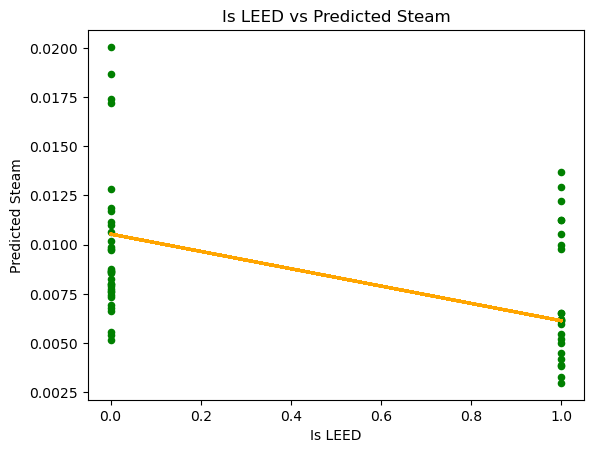

Our model's regression's slope is: -0.0044067168032942885
Our model's regression's intercept is: 0.010538668599657419
Seaborn's regression's slope is: -0.003947208608194989
Seaborn's regression's intercept is: 0.010315380388121445


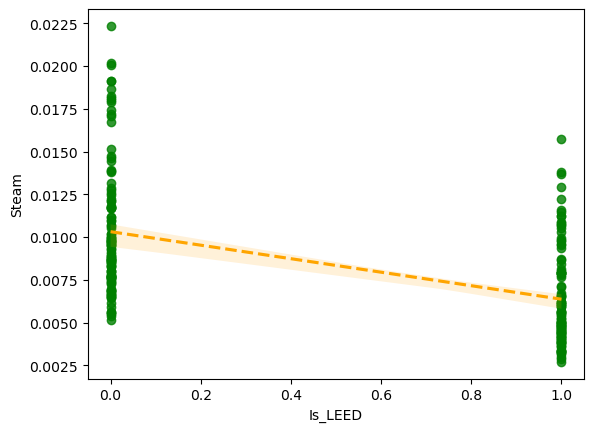

In [158]:
plt.scatter(X_test['Is_LEED'], y_test, color='green', s=20)
plt.plot(X_test['Is_LEED'], model.coef_[0] * X_test['Is_LEED'] + model.intercept_, linestyle='--', \
         color='orange', linewidth=2)
plt.xlabel('Is LEED')
plt.ylabel('Predicted Steam')
plt.title('Is LEED vs Predicted Steam')
plt.show()

ax = sns.regplot(x='Is_LEED', y='Steam', data=steam_df, n_boot=30, scatter_kws={"color": "green"}, \
                 line_kws={"color": "orange", 'linestyle':'--'})
slope, intercept, r, ax, sterr = scipy.stats.linregress(x=ax.get_lines()[0].get_xdata(),
                                                       y=ax.get_lines()[0].get_ydata())

print("Our model's regression's slope is: " + str(model.coef_[0]))
print("Our model's regression's intercept is: " + str(model.intercept_))
print("Seaborn's regression's slope is: " + str(slope))
print("Seaborn's regression's intercept is: " + str(intercept))

## Hypothesis 5

Among the LEED certified buildings, we predict that the higher the energy and atmosphere LEED rating ratio, the lower the average steam usage.  Like Hypothesis 3, this analysis will be done via a linear regression, which takes in the energy and atmosphere rating ratio of some LEED-certified building, as well as some of the months of the year.  The ouput of the regression is a prediction of what the monthly steam usage might be

This model will then return the predicted steam usage, based on those inputs. We will then attempt to see if β_rating < 0.

Like Hypothesis 3, we make a steam DataFrame for each one of the LEED-certified buildings in our analysis and stack these DataFrames to get a DataFrame that contains the steam usage monthly averages, as well as 12 dummy columns which indicate what month it is depending on which one of these dummy columns has a 1 value in it.

In [159]:
hyp5_dfs = []

for name, df in zip(list(leed_sqft_dict.keys()), leed_dfs):
    hyp5_dfs.append(fill_steam_df(df, name).dropna())

leed_steam_df = pd.concat(hyp5_dfs, axis=0, ignore_index=True)

From there, we once again use the typical approach to a linear regression, using multiple columns as input in the same way as Hypothesis 3.

Our model shows a positive coefficient for the linear regression, meaning that a LEED-certified building's energy and atmosphere rating ratio is positively correlated with monthly steam usage, taking the month into account.

This does not support our hypothesis, which was that a higher energy and atmosphere rating would correspond to lower steam usage.  Again, like we say in Hypothesis 3, this could be due to the fact that the energy and atmosphere ratings correspond to many more things than just energy efficiency, so higher ratings may not always necessarily correspond to lower steam usage.  Further investigation is needed to better determine why this is.

From there, we attempt a prediction on the X test variable, which we can use to check our residuals or error variables.

In [160]:

X = leed_steam_df.drop('Steam', axis=1)
y = leed_steam_df['Steam']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

model = LinearRegression().fit(X_train, y_train)

ols_model = sm.OLS(y_train, X_train)
result = ols_model.fit()
print(f"Model's P-value: {result.pvalues.values}")

y_pred = model.predict(X_test)

print("Our model's coefficient is the following: " + str(model.coef_))

rmse = mean_squared_error(y_test, y_pred, squared=False)
print('Root Mean Squared Error on Test Set: '+ str(rmse))

mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error on Test Set: ' + str(mae))

Model's P-value: [4.78550048e-39]
Our model's coefficient is the following: [0.01216233]
Root Mean Squared Error on Test Set: 0.0022172642776143083
Mean Absolute Error on Test Set: 0.0016875418829581416


**Evaluation of Significance 5:** Here, the null hypothesis would be that there is no correlation between a LEED certified building's energy and atmosphere rating and its steam usage during winter months. With a p-value of 4.78550048e-39, which is less than 0.05, we can reject the null hypothesis. This means that there is a correlation between those two variables, which is depicted by the model's coefficient.

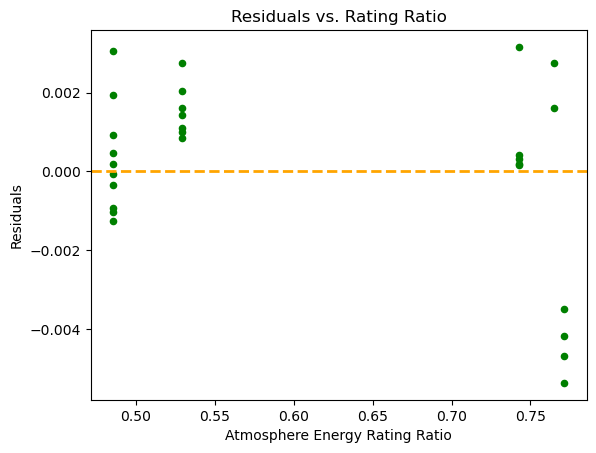

In [161]:
residuals = y_test - y_pred
plt.scatter(X_test['Atmosphere Energy Rating Ratio'], residuals, color='green', s=20)
plt.axhline(y=0, color='orange', linestyle='--', linewidth=2)
plt.xlabel('Atmosphere Energy Rating Ratio')
plt.ylabel('Residuals')
plt.title('Residuals vs. Rating Ratio')
plt.show()

The final code block below displays a best fit line from our model, and the one that Seaborn's regplot() function calculates for us.

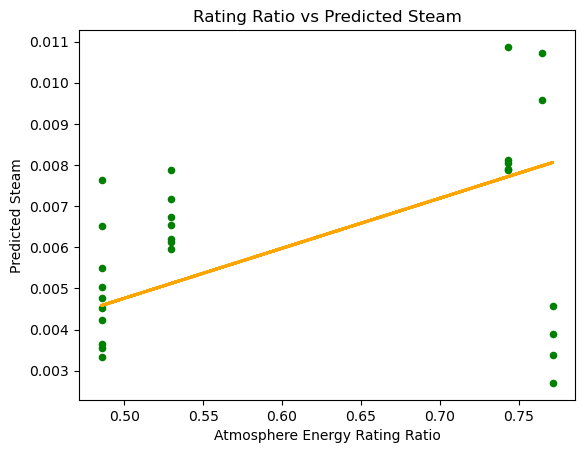

Our model's regression's slope is: 0.012162334789757142
Our model's regression's intercept is: -0.0013204188127039617
Seaborn's regression's slope is: 0.010640019726380675
Seaborn's regression's intercept is: -0.0003222355819362307


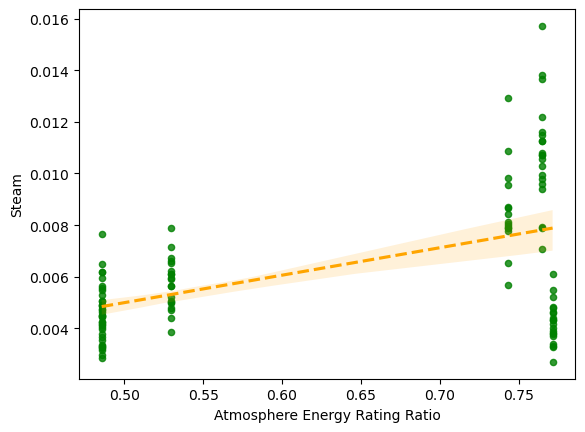

In [162]:
plt.scatter(X_test['Atmosphere Energy Rating Ratio'], y_test, color='green', s=20)
plt.plot(X_test['Atmosphere Energy Rating Ratio'], model.coef_[0] * X_test['Atmosphere Energy Rating Ratio'] \
         + model.intercept_, linestyle='--', color='orange', linewidth=2)
plt.xlabel('Atmosphere Energy Rating Ratio')
plt.ylabel('Predicted Steam')
plt.title('Rating Ratio vs Predicted Steam')
plt.show()

ax = sns.regplot(x='Atmosphere Energy Rating Ratio', y='Steam', data=leed_steam_df, n_boot=30, \
                 scatter_kws={"color": "green", "s": 20}, line_kws={"color": "orange", 'linestyle':'--'})
slope, intercept, r, ax, sterr = scipy.stats.linregress(x=ax.get_lines()[0].get_xdata(),
                                                       y=ax.get_lines()[0].get_ydata())
print("Our model's regression's slope is: " + str(model.coef_[0]))
print("Our model's regression's intercept is: " + str(model.intercept_))
print("Seaborn's regression's slope is: " + str(slope))
print("Seaborn's regression's intercept is: " + str(intercept))

As we can see from the graphs, our model shows a positive relationship between a building having a higher energy and atmosphere rating ratio and the monthly average steam usage as a whole.  This is not what we expected.  We also run this again with the Seaborn bootstrapped model to verify.

# Conclusions

Our analyses show that there is some efficiency improvement between LEED Buildings and Non LEED buildings in terms of their chilled water usage and their steam usage.  In other words, LEED buildings showed both lower chilled water and steam usage than non-LEED buildings.  However, when it comes to comparing LEED buildings' energy and atmosphere scores, we found in fact a positive correlation between a higher score and higher resources used for both steam and chilled water.  This could be due to the fact that the ratings take into account many other aspects, which we don't take into account in our analysis.

# Limitations
**Continuous Missing Data:** There is one df, upson_hall_df, that does not have data for a couple of months in the 5 year period we are examining. This implies that instead of 6 buildings to draw data from, at that point in time, we have only 5, which reduces our sample size and consequently the validity of the generalization, given it is already a relatively small sample size. Because most buildings follow a similar temporal trend, we did not think these couple months would greatly change our analysis, so we chose to look past this gap given it is only a couple months out of 60 months. 

**Building Use / Usage Time:** In our data cleaning, we do not take into account what the building is used for / when the building is used beyond disqualifying dorms and dining halls, which could have an impact on chilled water, steam, and electricity use. This could undermine the validity of our analysis if building use / usage time has a large enough impact on the three metrics (either positively or negatively) and if the buildings we chose for one category (LEED vs non LEED) are fundamentally different in use / usage time from the other category. For example, some buildings are open later than others (like the libraries), and some of the buildings have special (laboratory/research) equipment which could require more electricity (like milstein and human ecology). After our exploratory data analysis, we ruled out examining electricity for a couple of reasons. Firstly, there is great variance between some buildings, in both LEED and non-LEED categories (for example, Upson Hall uses practically no electricity whatsoever). Secondly, electricity use is not directly related to LEED certification because it is not a measure of space efficiency like chilled water and steam use is, meaning that there might not be as strong as a correlation as expected. 

**Normalizing:** One point of concern during our analyses was that our normalizing method was not accurate. Chilled water use and steam use cool/heat a 3D space, a.k.a volume, and our normalizing value was square feet (measure of area). Because we were not able to find the volume of the buildings, we kept the square feet normalizer because we knew that it would provide our analysis more accuracy than any other normalizer we thought of. Secondly, normalizing by this method meant that our analyses would revolve around significantly small ratios, which are arguably unpleasant to the eye and definitely more difficult to interpret. What would have been ideal was an adequate normalizer that takes into account the volumetric scale of buildings without significantly decreasing the numbers we work with for regressions, as an example. 

**Variable Transformations:** Most of our data follows a cyclic trend, with some variance. It does not follow a distribution that we have learned in class. Because of this, we were not able to perform some calculations, such as the typical hypothesis tests, confidence intervals, etc. that we have seen in class, given that the distribution of our data doesn't follow one of these examples. We could have used bootstrapping as an alternative to using one of distributions, which is of course not preferred, but were ultimately deterred from doing so as well because of the time series nature of our data. Sliding window could have been a valid approach here but the length of the sliding window became a concern because we are ultimately working with monthly average values, and not true time step intervals such as days.

# Acknowledgements
Thank you to Professor Koenecke and Rosamond Thalken for instructing us on the content used in this course.  Thank you to Muhan and the other TAs for their continued feedback!